# Seminario «Fundamentales de visualización en Python» <a name="introduction"></a>






Taller impartido por [Jaime García Chaparro](https://www.linkedin.com/in/jgchaparro/) en Ironhack Madrid el 19 de enero de 2023.

## Índice de contenidos

1. Matplotlib
2. Seaborn
3. Plotly Express
4. Missingno

# Matplotlib

Matplotlib es la librería más básica para visualización en Python.

In [ ]:
# La  versión de Matplotlib por defecto de Colab está desactualizada (3.2.2)
# ¡Reinicia el kernel después de ejecutar esta celda!
!pip install matplotlib==3.5.0

In [1]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Importar modulos básicos
import pandas as pd
import numpy as np

In [2]:
# Importar datos
datos = pd.read_csv('https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/Datasets/PIB%20per%20capita%20largo%20(d%C3%B3lares%20de%202010).csv')

# Utilizar datos de España
españa = datos[datos['country'] == 'Spain']
españa.head(5)

,country,year,value
28,Spain,1960,6220
115,Spain,1961,6890
206,Spain,1962,7500
297,Spain,1963,8150
388,Spain,1964,8500


## Partes de una imagen en matplotlib.pyplot

Cada imagen tiene tres partes principales:
* Figure: la imagen en su conjunto.
* Axes: cada una de las cajas que contienen gráficas.
* Axis: ejes vertical y horizontal.

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/matplolib_figure_and_axes.png> </img></center>

Otros objetos menores, aunque bastante usados, son los títulos, las etiquetas (labels) o los ticks. Cada gráfica cuenta con multitud de objetos personalizables.

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/matplotlib_figure_anatomy.png> </img></center>

### Formas de crear gráficos

Matplotlib cuenta con dos métodos para crear los gráficos. La sintaxis concreta dependerá de que se use uno u otro.

- **Método explícito, orientado a objetos**: algo más lento de escribir, pero aporta más control y replica el comportamiento de otros objetos de Matplotlib. Recomendado para visualizaciones más complejas o detalladas.

Algunos objetos de Matplotlib son los siguientes:

- Figure
- Artist
- Axes
- Axis
- Text
- Polygon

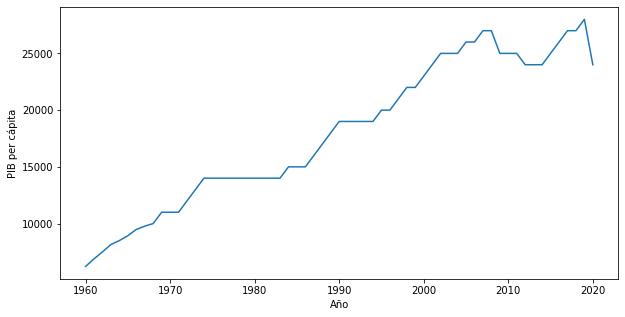

In [3]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(españa['year'], españa['value'])
ax.set_xlabel('Año')
ax.set_ylabel('PIB per cápita');

- **Método implícito de Pyplot**: más rápido y compacto. Recomendado para plots simples.

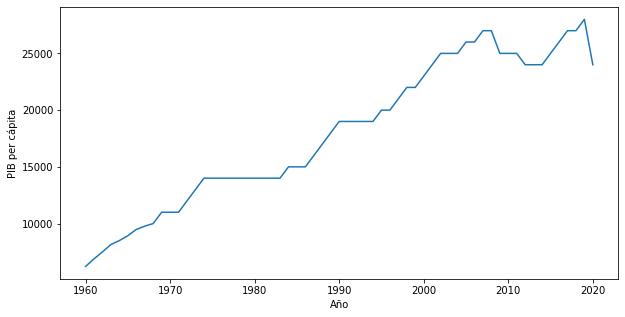

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(españa['year'], españa['value'])
plt.xlabel('Año')
plt.ylabel('PIB per cápita');

Recuerda añadir `;` al final de la última línea para evitar que se imprima el objeto y dar un aspecto más limpio.

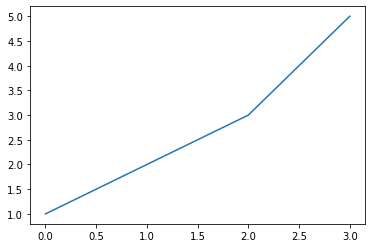

In [5]:
plt.plot([1, 2, 3, 5])

## Personalizando los gráficos

### Básicos

Matplotlib ofrece multitud de argumentos para personalizar el gráfico que deben pasarse como kwargs al crear el gráfico. Cada gráfico tiene su lista de argumentos particular, aunque muchos se comparten.

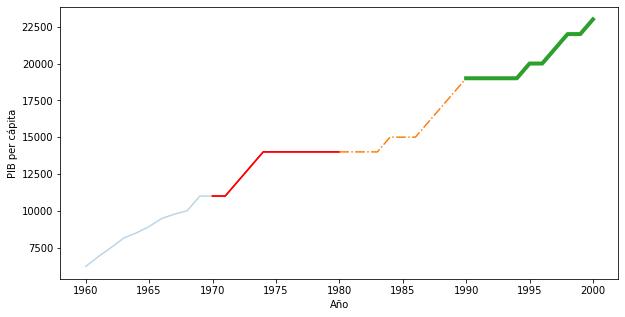

In [6]:
plt.figure(figsize = (10, 5))

# Añade transparencia
plt.plot('year', 'value', data = españa[españa['year'].between(1960, 1970)], alpha = 0.3)

# Cambia el color a rojo
plt.plot('year', 'value', data = españa[españa['year'].between(1970, 1980)], color = 'red')
# Utiliza un código de color hexadecimal
plt.plot('year', 'value', data = españa[españa['year'].between(1970, 1980)], color = '#FF0000') # Color rojo

# Cambia el tipo de línea
plt.plot('year', 'value', data = españa[españa['year'].between(1980, 1990)], linestyle = '-.')

# Cambia el grosor de la línea
plt.plot('year', 'value', data = españa[españa['year'].between(1990, 2000)], linewidth = 4)

plt.xlabel('Año')
plt.ylabel('PIB per cápita');

#### Limitar el rango del gráfico

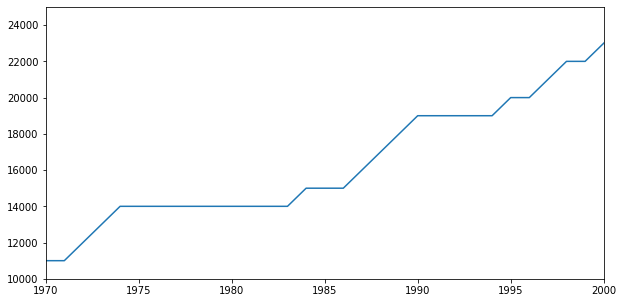

In [7]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('year', 'value', data = españa)

# Límite horizontal
ax.set_xlim(1970, 2000)

# Límite vertical
ax.set_ylim(10000, 25000);

# Fijar ambos límites a la vez
# ax.set(xlim = [1970, 2000], ylim = [10000, 25000]);

#### Modificar los ticks

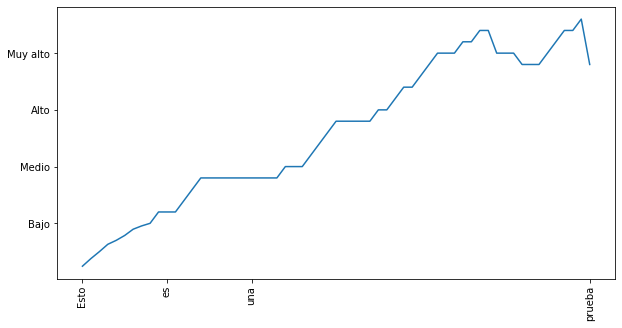

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('year', 'value', data = españa)

# Cambiar los ticks horizontales
# Es un objeto Text
ax.set_xticks(ticks = [1960, 1970, 1980, 2020]) # Posición en la que iría el texto
ax.set_xticklabels(['Esto', 'es', 'una', 'prueba'], 
    rotation = 90)

# Ticks verticales
ax.set_yticks(ticks = [10000, 15000, 20000, 25000]) # Posición en la que iría el texto
ax.set_yticklabels(['Bajo', 'Medio', 'Alto', 'Muy alto']);

# Ocultar los ticks
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

#### Añadir títulos y leyendas

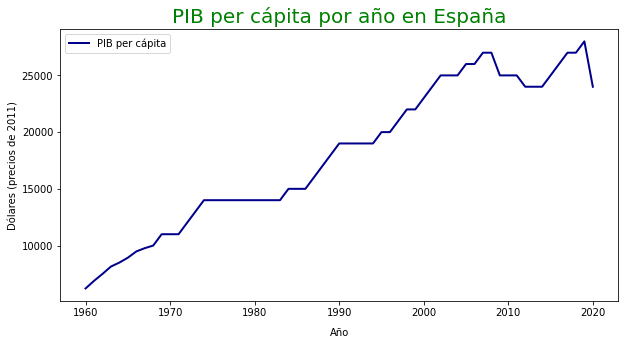

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Título general
ax.set_title('PIB per cápita por año en España',
    # Consultar enlace «Argumentos para texto en Matplotlib»
    fontsize = 20, # Tamaño de la letra
    fontfamily = 'DejaVu Sans', # Tipo de letra
    color = 'green')

# Añadir leyenda
line.set_label('PIB per cápita') # Prepara el texto de la leyenda
ax.legend() # Añade la leyenda

# Título en el eje horizontal
ax.set_xlabel(
    'Año', 
    labelpad = 10, # Separación del título con el eje
)

# Título en el eje horizontal vertical
ax.set_ylabel(
    'Dólares (precios de 2011)');

#### Guardar imagen

In [10]:
fig.savefig(
    'imagen_de_ejemplo.png', 
    transparent = True # Usar fondo transparente
    )

### Otras modificaciones


#### Modificar el fondo y los bordes del gráfico

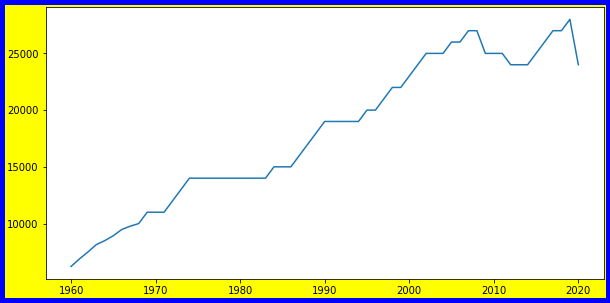

In [11]:
fig, ax = plt.subplots(
    figsize = (10, 5), 
    facecolor = 'yellow',
    edgecolor = 'blue', # Borde de la imagen
    linewidth = 10 # Grosor del borde
    ) 
ax.plot('year', 'value', data = españa);

#### Añadir líneas

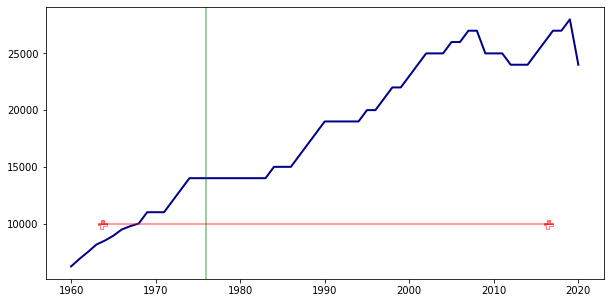

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Añade una línea horizontal
ax.axhline(10000, 
    color = 'red', 
    linestyle = '-', 
    alpha = 0.5, 
    xmin = 0.1, # Punto de inicio como proporción del gráfico
    xmax = 0.9, # Punto final como proporción del gráfico
    marker = 'P', # Marcador para el borde de la línea
    markersize = 9, # Tamaño del marcador
    fillstyle = 'top' # Relleno del marcador
    )

# Añade una línea vertical
ax.axvline(1976, color = 'green', alpha = 0.5);

#### Añadir texto, flechas y rejillas

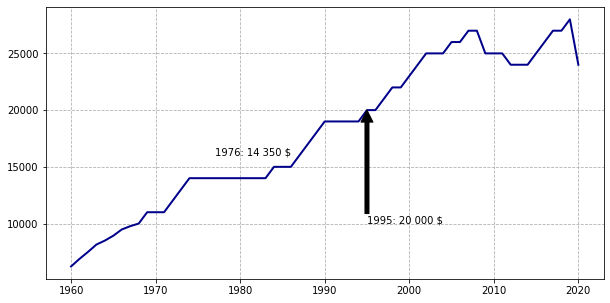

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Añade texto al gráfico
ax.text(1977, 16000, '1976: 14 350 $')

# Anotación con flecha
ax.annotate(
    '1995: 20 000 $', 
    xy = (1995, 20000), # ¿A dónde apunta la flecha?
    arrowprops = {'facecolor' : 'black'}, # Características de la flecha 
    xytext = (1995, 10000), xycoords = 'data' # ¿Dónde se coloca el texto?
    )

# Añade una rejilla
ax.grid(True, linestyle = '--')

## Gráficos básicos en Matplotlib

### Gráfico de barras (barplot)

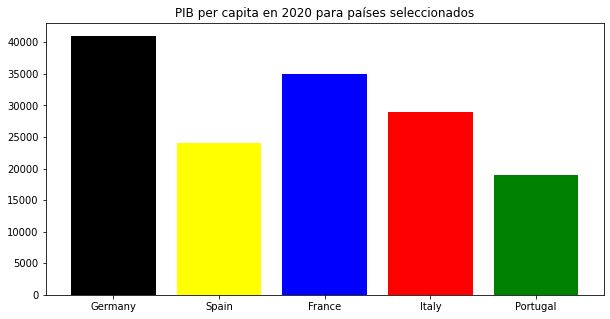

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))

# Seleccionar países
paises = ['Spain', 'Portugal', 'France', 'Germany', 'Italy']
seleccion = datos[(datos['year'] == 2020) & (datos['country'].isin(paises))]

colores = ['black', 'yellow', 'blue', 'red', 'green']

# Crear gráfico
ax.bar('country', 'value', data = seleccion, color = colores)
ax.set_title('PIB per capita en 2020 para países seleccionados');

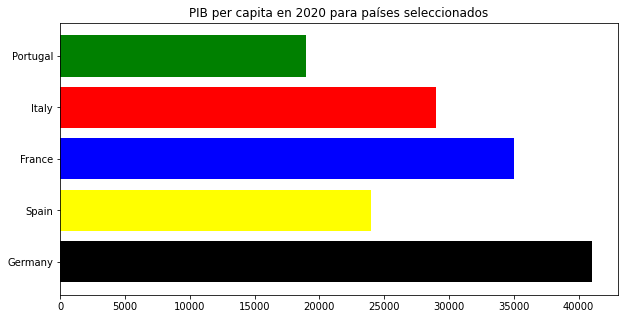

In [15]:
# Gráfico de barras horizontal
# Útil cuando hay muchas etiquetas y largas
fig, ax = plt.subplots(figsize = (10, 5))

ax.barh('country', 'value', data = seleccion, color = colores)
ax.set_title('PIB per capita en 2020 para países seleccionados');

### Interpretación de un boxplot


![Interpretación de un boxplot](https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/matplotlib_boxplot_interpretation.png "Figure and axes")

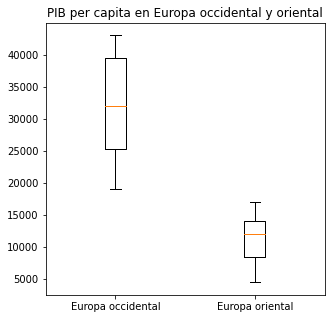

In [16]:
# Elegir países
europa_occidental = ['Spain', 'Portugal', 'France', 'Germany', 'Italy', 'United Kingdom']
europa_oriental = ['Greece', 'Romania', 'Bulgaria', 'Poland', 'Hungary', 'Slovakia', 'Albania']

# Extraer información para esos países
pib_occidental = datos[(datos['year'] == 2020) & (datos['country'].isin(europa_occidental))]['value'].values
pib_oriental = datos[(datos['year'] == 2020) & (datos['country'].isin(europa_oriental))]['value'].values

# Incluir ambas listas de información en una sola lista
# El boxplot exige que estén en una sola lista (lista de listas)
pib_europa = [pib_occidental, pib_oriental]

# Crea el boxplot
fig, ax = plt.subplots(figsize = (5, 5))
ax.boxplot(pib_europa)
ax.set_title('PIB per capita en Europa occidental y oriental')
ax.set_xticklabels(['Europa occidental', 'Europa oriental']);

### Histograma


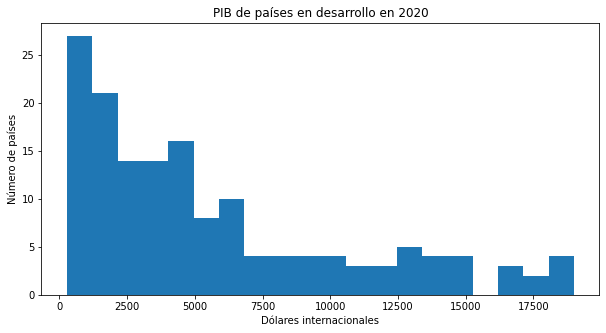

In [17]:
# Obtener datos para todos los países en 2020
datos_2020 = datos[datos['year'] == 2020]
pib_2020 = datos_2020['value']

# Seleccionar países con un PIB per cápita de menos de 20 000 dólares
pib_2020_seleccion = list(filter(lambda x: x < 20000, pib_2020))

# Crear el histograma
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(pib_2020_seleccion, bins = 20)
ax.set_title('PIB de países en desarrollo en 2020')
ax.set_ylabel('Número de países')
ax.set_xlabel('Dólares internacionales');

#### Gráfico de violín (violinplot)

Similar a un boxplot, pero mostrando la distribución

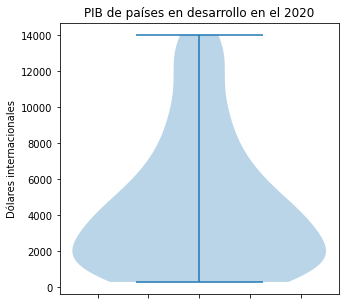

In [18]:
# Datos para todos los países en desarrollo en 2020
pib_2020 = datos[(datos['year'] == 2020) & (datos['value'] < 15000)]['value']

# Crea el boxplot
fig, ax = plt.subplots(figsize = (5, 5))
ax.violinplot(pib_2020)
ax.set_title('PIB de países en desarrollo en el 2020')
ax.set_ylabel('Dólares internacionales')
ax.set(xticklabels = []);

### Gráfico circular (pie chart)

[Piensa primero si usar un gráfico circular es buena idea](https://www.data-to-viz.com/caveat/pie.html)

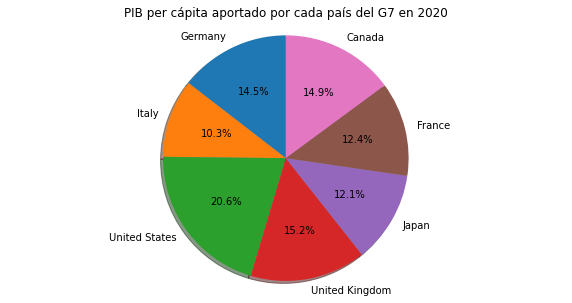

In [19]:
# Datos sobre PIB en los países del G7
g7 = ['Germany', 'Italy', 'United States', 'United Kingdom', 'Japan', 'France', 'Canada']

pib_g7 = {
        pais : datos[(datos['year'] == 2020) & (datos['country'] == pais)]['value'].iloc[0] for pais in g7
}

# Crear el gráfico circular
# Importante: ¡utiliza el argumento 'facecolor' o el fondo será transparente!
fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'white')
ax.pie(pib_g7.values(), # PIB per cápita de los países
        labels = pib_g7.keys(), # Etiquetas de los países
        autopct='%1.1f%%', # Mostrar porcentaje y en qué formato
        shadow=True, 
        startangle=90)
ax.set_title('PIB per cápita aportado por cada país del G7 en 2020')
ax.axis('equal');

### Gráficos extra

#### Gráfico de barras apilado

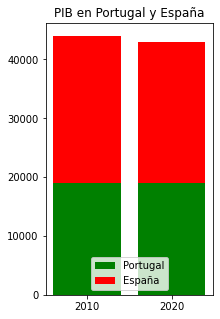

In [20]:
fig, ax = plt.subplots(figsize = (3, 5))

etiquetas = ['2010', '2020']
españa_1020 = datos[(datos['year'].isin([2010, 2020])) & (datos['country'] == 'Spain')]
portugal_1020 = datos[(datos['year'].isin([2010, 2020])) & (datos['country'] == 'Portugal')]

ax.bar(etiquetas, 'value', data = portugal_1020, color = 'green', label = 'Portugal')
ax.bar(etiquetas, 'value', data = españa_1020, bottom = portugal_1020['value'], color = 'red', label = 'España')

ax.set_title('PIB en Portugal y España')
ax.legend(loc = 'lower center');

#### Gráfico de área apilado

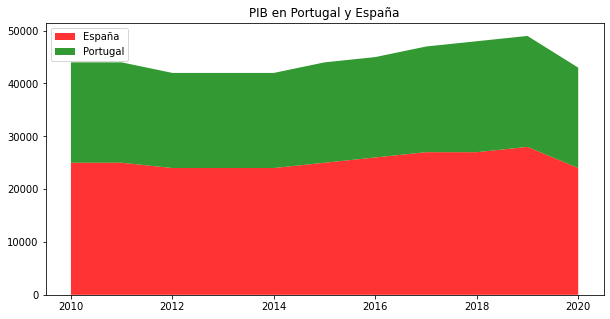

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))

años = [i for i in range(2010, 2021)]
valores = {
    'España' : datos[(datos['year'].between(2010, 2020)) & (datos['country'] == 'Spain')]['value'],
    'Portugal' : datos[(datos['year'].between(2010, 2020)) & (datos['country'] == 'Portugal')]['value']
}
 
ax.stackplot(años, valores.values(),
             labels= valores.keys(), 
             alpha=0.8, colors = ['red', 'green'])
ax.set_title('PIB en Portugal y España')
ax.legend(loc = 'upper left');

## Gráficos multiples en una sola imagen (subplots)

#### Subplots básicos

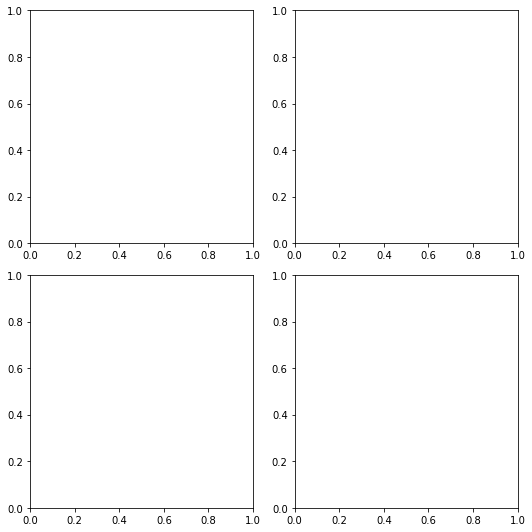

In [22]:
n_filas = 3
n_columnas = 2

# Crear los subplots
fig, axs = plt.subplots(
    nrows = 2, 
    ncols = 2,
    figsize = (7.5, 7.5))

# Utiliza tight layout para evitar superposiciones
fig.tight_layout();


#### Modificando subplots

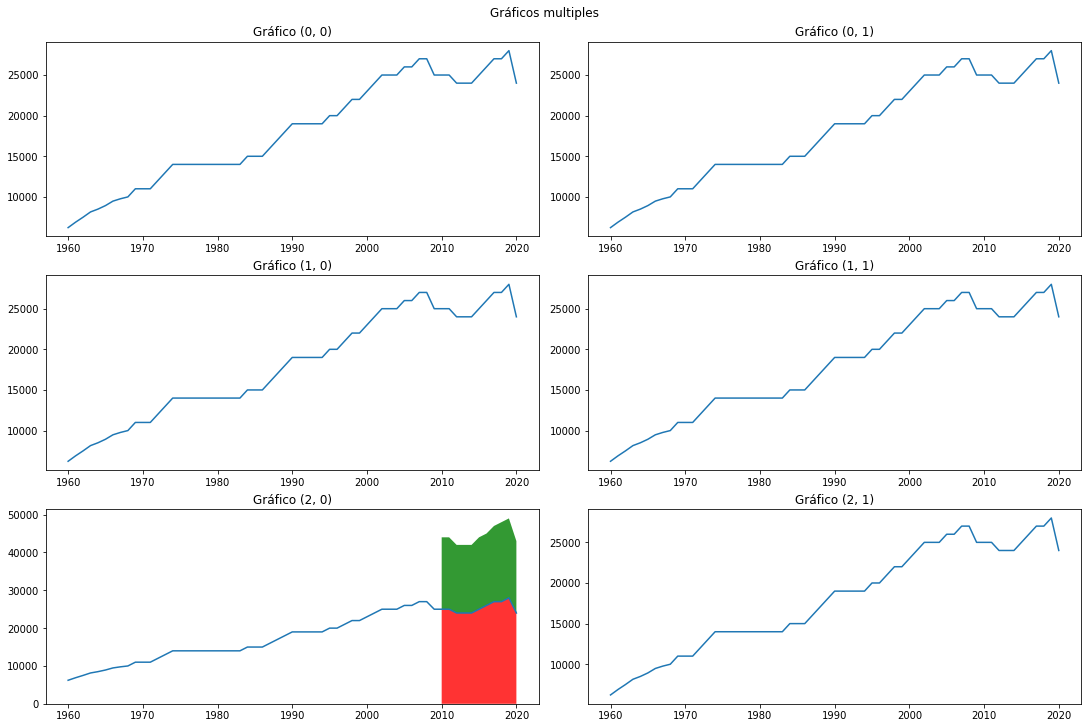

In [23]:
n_filas = 3
n_columnas = 2

# Crear los subplots
fig, axs = plt.subplots(
    n_filas, n_columnas, 
    figsize = (15, 10),
    sharex = False, sharey = False,
    constrained_layout = True # Para evitar que se solapen las etiquetas
    )
 
for i in range(n_filas):
    for j in range(n_columnas):
        axs[i, j].plot('year', 'value', data = españa)
        axs[i, j].set_title(f'Gráfico ({i}, {j})')

# Cambiar uno de los gráficos
axs[2, 0].stackplot(años, valores.values(),
             labels= valores.keys(), 
             alpha=0.8, colors = ['red', 'green'])

# Poner un título común
fig.suptitle('Gráficos multiples');

### Gráficos múltiples avanzados: mosaicos con subplots

Es posible generar composiciones complejas pasando una cadena de texto con números en la disposición deseada.

#### Mosaico con subplots

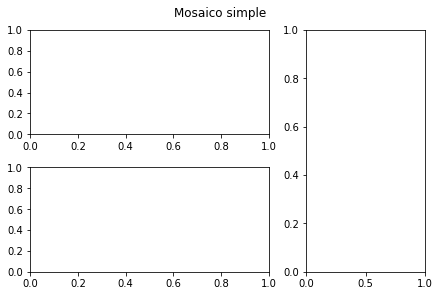

In [24]:
mosaico_simple = """
112
332
"""

fig, axs = plt.subplot_mosaic(mosaico_simple, layout = 'constrained')
fig.suptitle('Mosaico simple');

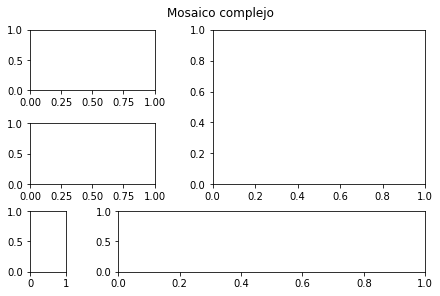

In [25]:
mosaico_complejo = """
11222
33222
45555
"""

fig, axs = plt.subplot_mosaic(mosaico_complejo, layout = 'constrained')
fig.suptitle('Mosaico complejo');

## Extras

### Ajustes por defecto

Los rc (runtime configuration) settings son un diccionario que contiene los ajustes por defecto para la visualización de los gráficos. A diferencia de la mayoría de objetos utilizados aquí, este diccionario se debe importar del modulo matplotlib y no matplotlib.pyplot.

In [26]:
# Importar matplotlib
import matplotlib as mpl

mpl.rcParams['lines.linestyle'] = ':'

# Restaurar los parámetros por defecto
mpl.rcParams.update(mpl.rcParamsDefault)

### Estilos

Los estilos modifican los parámetros por defecto contenidos en rcParams.

[Lista completa de estilos](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh']


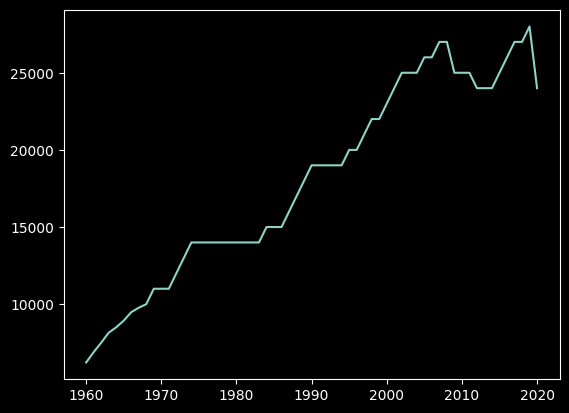

In [27]:
# Mostrar estilos disponibles
styles = plt.style.available
print(styles[:5])

# Activar un estilo
plt.style.use('dark_background')

plt.plot('year', 'value', data = españa)

# Resetear al estilo por defecto
mpl.rcParams.update(mpl.rcParamsDefault);

## Casos prácticos con Matplotlib

In [28]:
# Visualizar los datos
españa.head()

,country,year,value
28,Spain,1960,6220
115,Spain,1961,6890
206,Spain,1962,7500
297,Spain,1963,8150
388,Spain,1964,8500


### 1) Muestra el PIB de España con un gráfico de línea

- Usa la variable `datos`

Ejemplo de solucción:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/matplotlib_ex_1.png> </img></center>

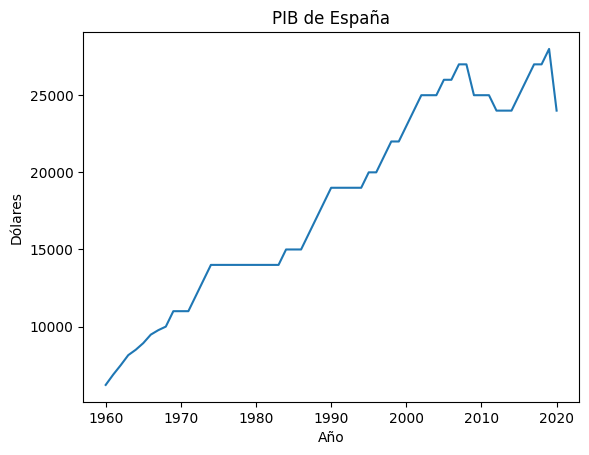

In [29]:
datos = españa

...

fig, ax = plt.subplots()
ax.plot('year', 'value', data = españa)
ax.set_title('PIB de España')
ax.set_xlabel('Año')
ax.set_ylabel('Dólares');

### 2) Muestra el PIB de España con un gráfico de barras

- Usa la variable `datos`
- Cambia el color de las barras a rojo

Ejemplo de solucción:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/matplotlib_ex_2.png> </img></center>

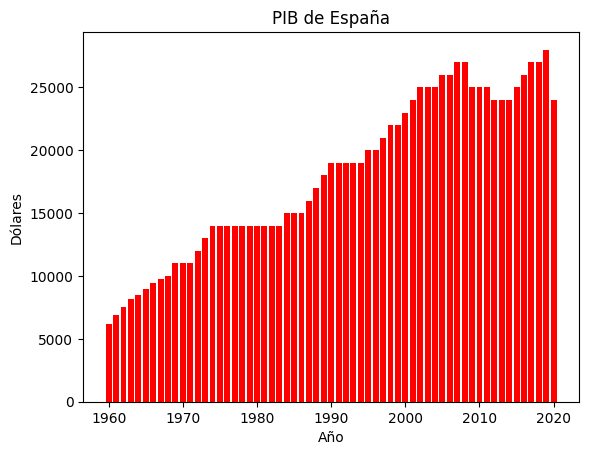

In [30]:
datos = españa

...

fig, ax = plt.subplots()
ax.bar('year', 'value', data = españa, color = 'red')
ax.set_title('PIB de España')
ax.set_xlabel('Año')
ax.set_ylabel('Dólares');

#### 3) Une los dos gráficos anteriores en subplots

- Usa las variables `datos_pre_1976` y `datos_post_1976`
- Crea una imagen con 4 subplots: 2 por fila y 2 por columna.
- Los gráficos de la primera columna deben ir en naranja; los de la segunda, en naranja.

Ejemplo de solucción:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/matplotlib_ex_3.png> </img></center>

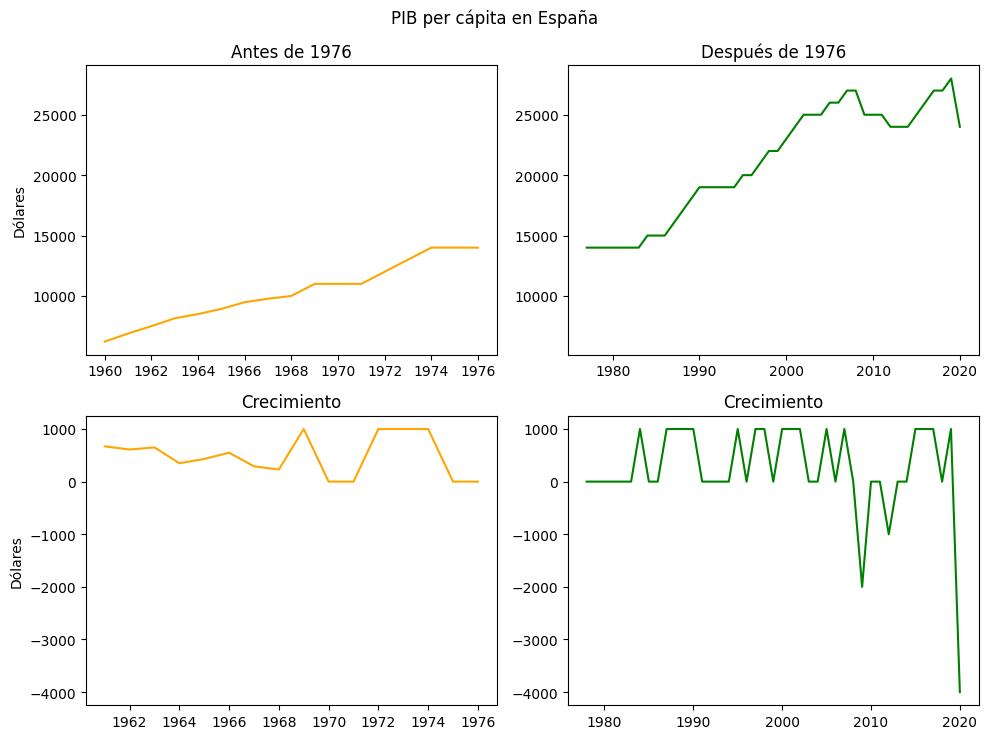

In [31]:
datos_pre_1976 = españa[españa['year'] <= 1976].copy()
datos_post_1976 = españa[españa['year'] > 1976].copy()

datos_pre_1976['year'] = datos_pre_1976['year'].astype(int)
datos_post_1976['year'] = datos_post_1976['year'].astype(int)

datos_pre_1976['crecimiento'] = datos_pre_1976['value'].diff()
datos_post_1976['crecimiento'] = datos_post_1976['value'].diff()

...

# Crea los subplots
fig, axs = plt.subplots(2, 2, figsize = (10, 7.5))

# Grafica los datos anteriores a 1976
axs[0, 0].plot('year', 'value',  data = datos_pre_1976, color = 'orange')
axs[1, 0].plot('year', 'crecimiento', data = datos_pre_1976, color = 'orange')

# Grafica los datos posteriores a 1976
axs[0, 1].plot('year', 'value', data = datos_post_1976, color = 'green')
axs[1, 1].plot('year','crecimiento', data = datos_post_1976, color = 'green')

# Añadir títulos
fig.suptitle('PIB per cápita en España')
axs[0, 0].set_title('Antes de 1976')
axs[0, 1].set_title('Después de 1976')
axs[1, 0].set_title('Crecimiento')
axs[1, 1].set_title('Crecimiento')

# Añadir etiquetas a los ejes
axs[0, 0].set_ylabel('Dólares')
axs[1, 0].set_ylabel('Dólares')

# ADICIONAL: Corregir floats en primera columna
axs[0, 0].locator_params(integer=True)
axs[1, 0].locator_params(integer=True)

# ADICIONAL: compartir ejes por filas
axs[0, 0].sharey(axs[0, 1])
axs[1, 0].sharey(axs[1, 1])

# Aplica tight_layout() para evitar superposiciones
fig.tight_layout()

# Seaborn

Seaborn es una librería de visualización construida sobre Matplotlib y muy integrada con Pandas.

In [32]:
# Importaciones
import seaborn as sns

# Cambiar el estilo por defecto
sns.set_theme()

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/seaborn_iris.png> </img></center>

In [33]:
# Importar el conjunto de datos de prueba
iris = sns.load_dataset('iris')
print(iris['species'].unique())
iris.head()

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Gráficos de ejes (axis-level) y gráficos de imagen (figure-level)

En Seaborn, hay dos tipos de gráficos:
* Gráficos de ejes: solo ocupan un eje. Aceptan el argumento `ax` y pueden usarse en subplots. Funcionan como los gráficos de Matplotlib. Representadas en las cajas pequeñas en la imagen.

* Gráficos de imagen: ocupan todo el espacio de la imagen. En consecuencia, no aceptan el argumento `ax` y no pueden agruparse en subplots. Contienen todas las funciones de ejes de una categoría, seleccionables a través del parámetro `kind`. Se gestionan a través de un objeto especial, `FacetGrid`. Representadas en las cajas grandes en la imagen. Permiten crear imágenes con múltiples gráficas rápidamente. Similares a sus contrapartidas de eje, pero con algunos cambios. Por ejemplo, la leyenda se coloca fuera de la imagen. 
    
<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/seaborn_figure_axis_functions.png> </img></center>

Las cajas grandes representan las funciones para generar gráficos de imagen, que contienen las funciones para gráficos de eje, recogidas en las cajas pequeñas.




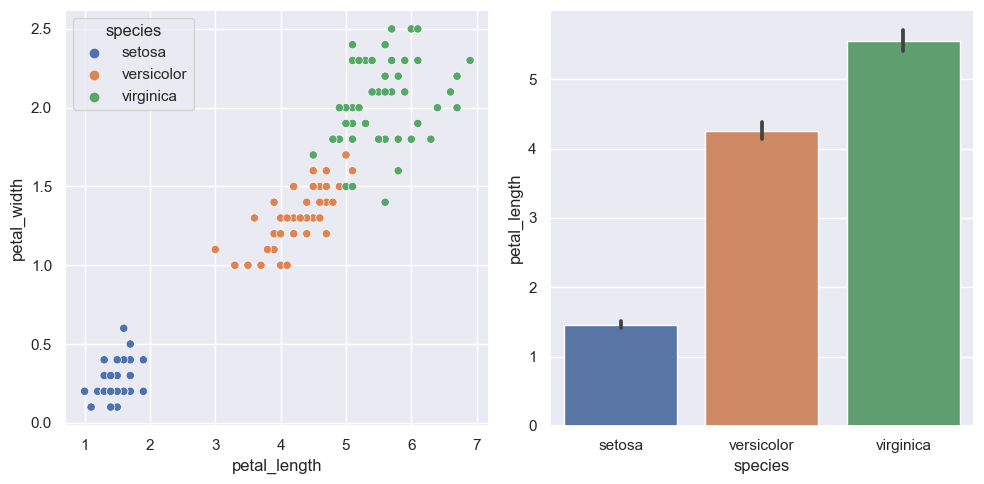

In [34]:
# Agrupando gráficos de eje
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', ax = axs[0])
sns.barplot(data = iris, x = 'species', y = 'petal_length', ax = axs[1])
fig.tight_layout();

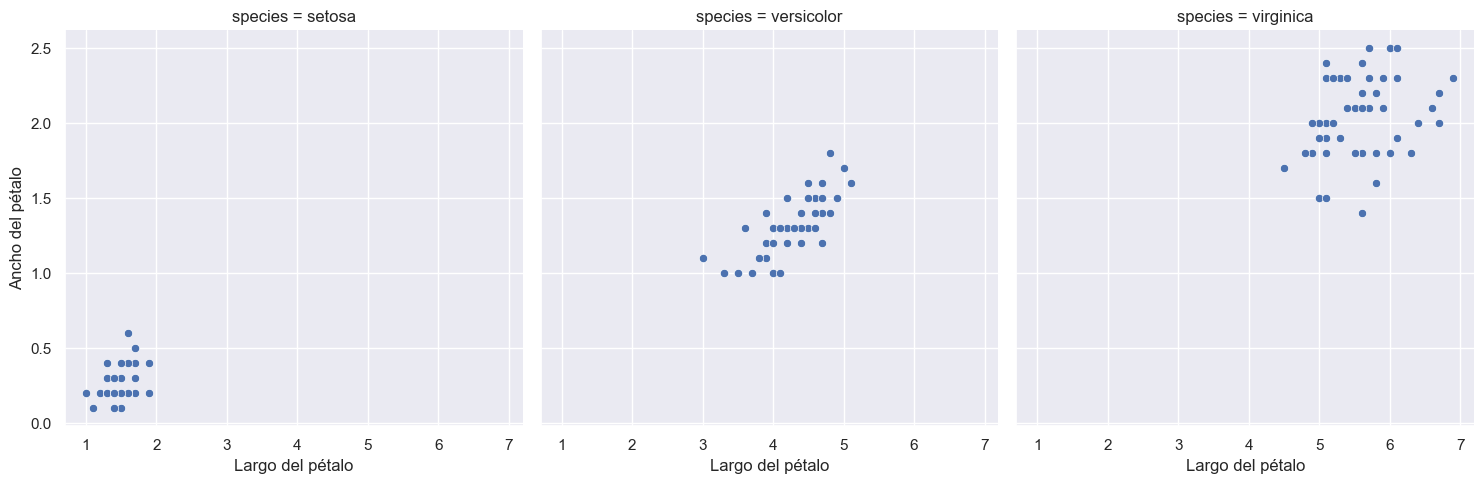

In [35]:
# Accediendo y modificando gráficos de imagen
# Personalización más limitada
fig = sns.relplot(
    data = iris, 
    x = 'petal_length', y = 'petal_width', 
    col = 'species', # Distinguir por especie
    kind = 'scatter' # Tipo de gráfico
    )
fig.set_axis_labels('Largo del pétalo', 'Ancho del pétalo');

###  Modificando el tamaño en gráficos de imagen

El tamaño de los subplots utiliza los parámetros `height` y `aspect` en lugar de `width` y `height` de Matplotlib. Se mide en pulgadas (1 pulgada = 2,5 cm). 

El tamaño de la imagen se calcula automáticamente en función del número de subplots y su tamaño.


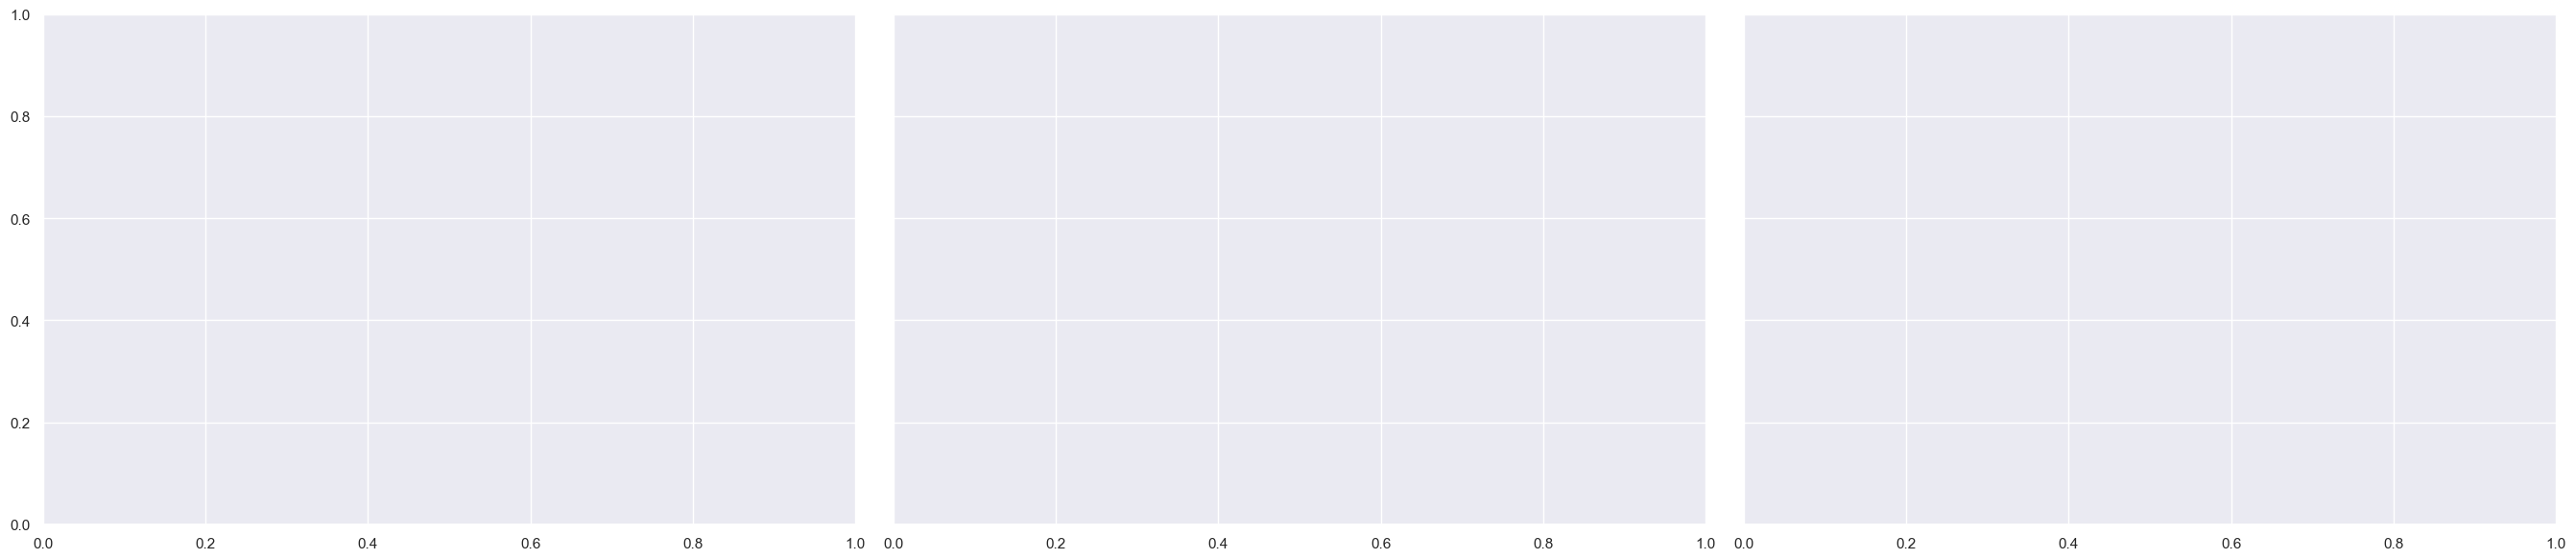

In [36]:
fig = sns.FacetGrid(iris, col = 'species', height = 6, aspect = 1.5);

## Gráficos básicos

### Gráfico de línea

Si para un punto hay más de una instancia, Seaborn computará automáticamente intervalos de confianza.

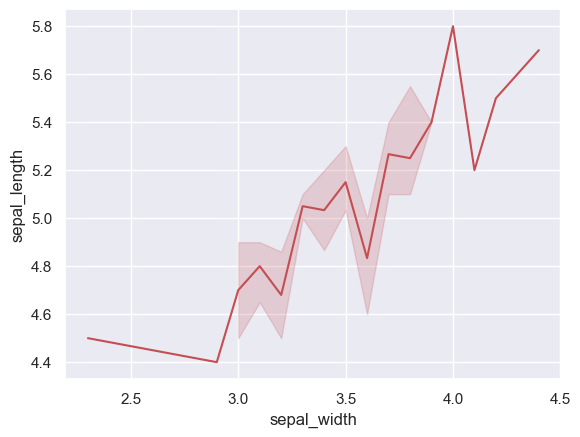

In [37]:
sns.lineplot(
    data = iris[iris['species'] == 'setosa'],
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'r'
    );

### Gráfico de dispersión (scatterplot)

* `hue` («matiz»): separa por colores en función de la variable introducida.

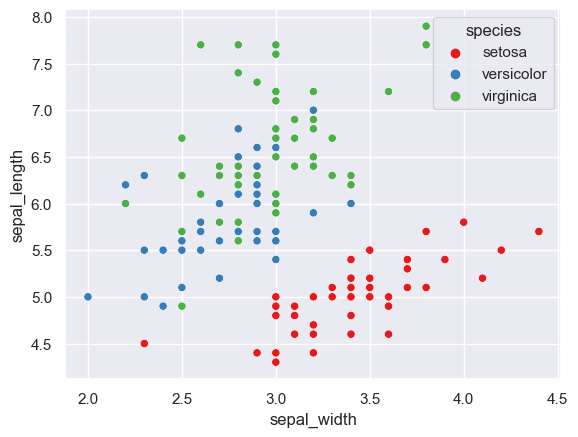

In [38]:
sns.scatterplot(
    data = iris,
    x = 'sepal_width',
    y = 'sepal_length',
    hue = 'species', # Distinguir colores por especie
    palette = 'Set1' # Definir colores
    );

### Gráfico de regresión (regplot)

Similar al gráfico de dispersión, pero añade una regresión lineal.

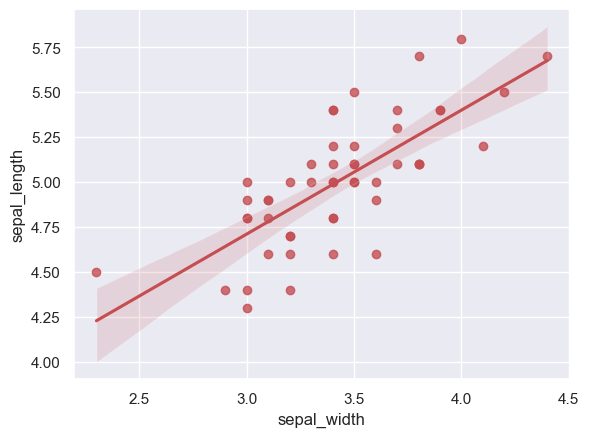

In [39]:
sns.regplot(
    data = iris[iris['species'] == 'setosa'],
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'r'
    );

### Gráfico de barras

* `dodge`: evita separaciones anómalas.

La línea negra sobre las barras indica  la media de la variable indicada y su desviación típica.

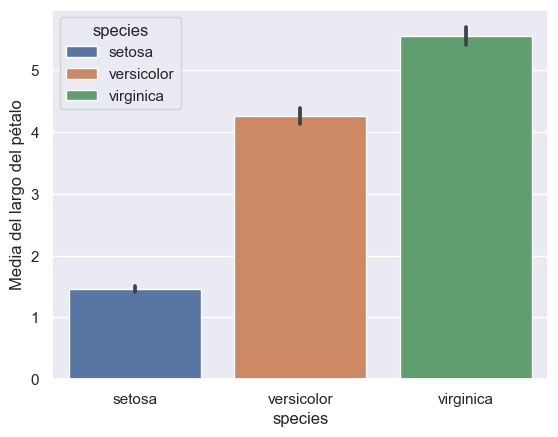

In [40]:
fig = sns.barplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    hue = 'species',
    dodge = False # Evita que las barras se separen demasiado
)
fig.set_ylabel('Media del largo del pétalo');

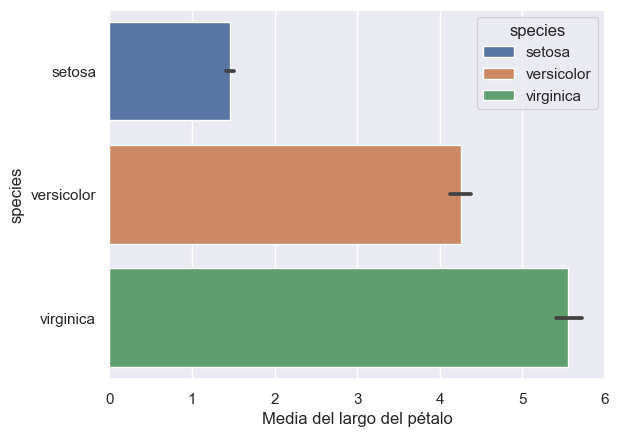

In [41]:
fig = sns.barplot(
    data = iris,
    x = 'petal_length',
    y = 'species',
    hue = 'species',
    dodge = False
)
fig.set_xlabel('Media del largo del pétalo');

### Histogramas

- `bins`: número de barras en las que se divide el gráfico. [¿Cómo elegir el número de bins?](https://www.statisticshowto.com/choose-bin-sizes-statistics/)
- `kde`: estimación de la distribución subyacente que genera los datos.

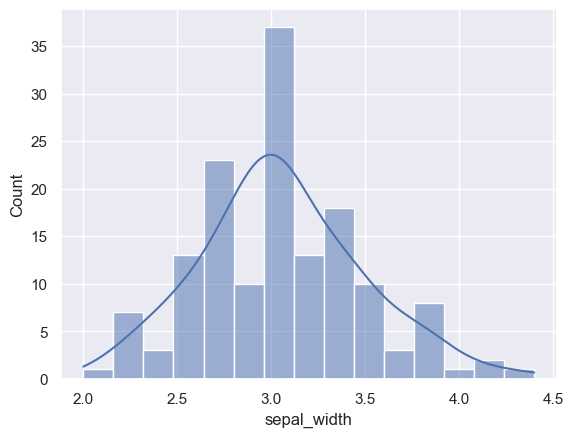

In [42]:
sns.histplot(
    data = iris,
    x = 'sepal_width',
    bins = 15,
    kde = True # Mostrar distribución de probabilidad
);

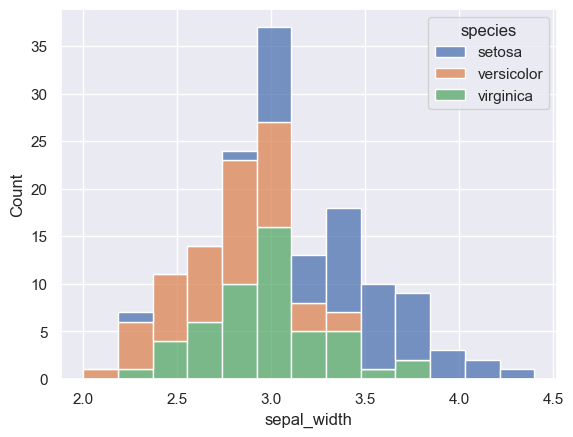

In [43]:
# Distinguir según especie
sns.histplot(
    data = iris,
    x = 'sepal_width',
    hue = 'species',
    multiple = 'stack'
);

### Mapa de calor (heatmap)

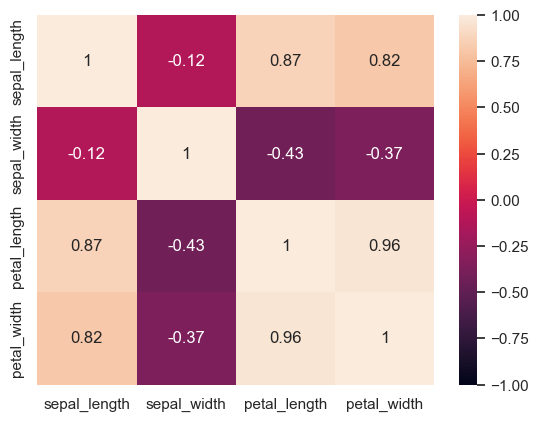

In [44]:
sns.heatmap(
    data = iris.corr(), # Correlaciones entre variables
    annot = True, # Mostrar valores de la tabla. En este caso, las correlaciones
    vmin = -1, # Valor máximo
    vmax = 1, # Valor mínimo
);

### Mapa de calor jerarquizado (clustered heatmap)

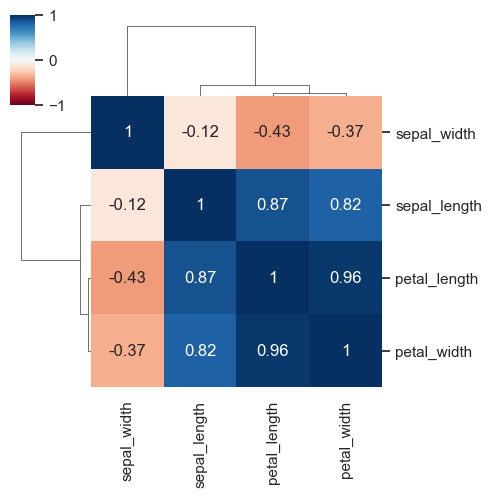

In [45]:
sns.clustermap(
    data = iris.corr(), # Correlaciones entre variables
    annot = True, # Mostrar valores de la tabla. En este caso, las correlaciones
    vmin = -1, # Valor máximo
    vmax = 1, # Valor mínimo
    figsize = (5, 5), # Cambiar tamaño de gráfico
    cmap = 'RdBu'
    );

### Gráfico de cajas (boxplot)

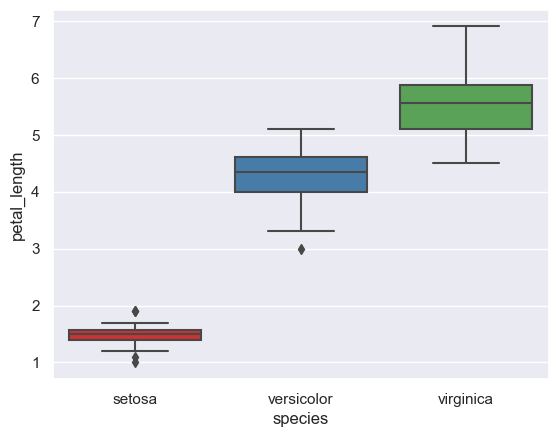

In [46]:
sns.boxplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Gráficos de violín (swarmplot)

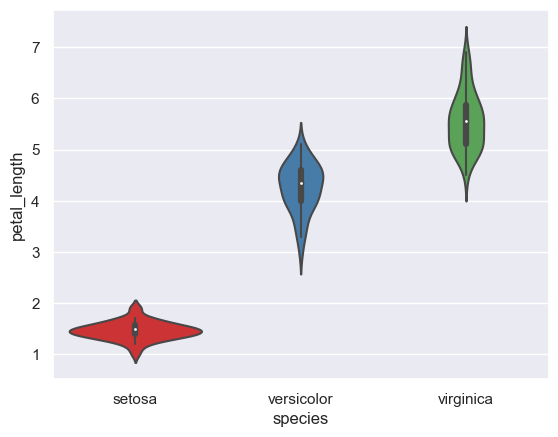

In [47]:
sns.violinplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Gráficos de enjambre (swarmplot)

c:\Users\jgcha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


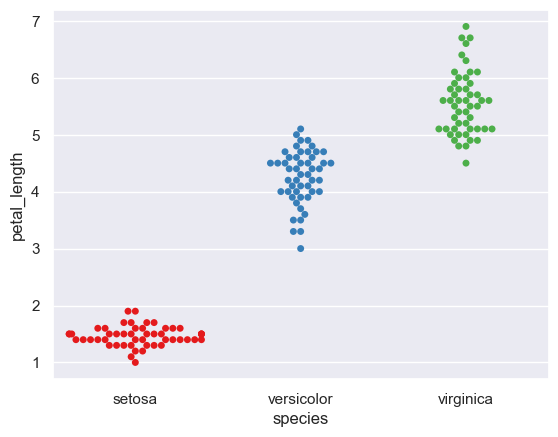

In [48]:
sns.swarmplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Stripplot

In [49]:
# Cambiar a formato largo
# especie - variable - valor
iris_long = pd.melt(iris, 'species', var_name = 'measurement')
iris_long.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


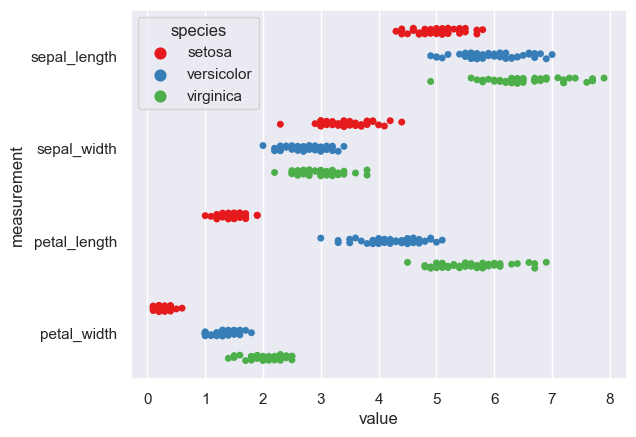

In [50]:
sns.stripplot(
    data = iris_long,
    x = 'value',
    y = 'measurement',
    hue = 'species',
    dodge = True, # Parea evitar solapamientos
    palette = 'Set1',
);

## Gráficos especiales

Los `jointplot` y `pairplot` combinan características de gráficos de relación y distribución en un solo gráfico de imagen.

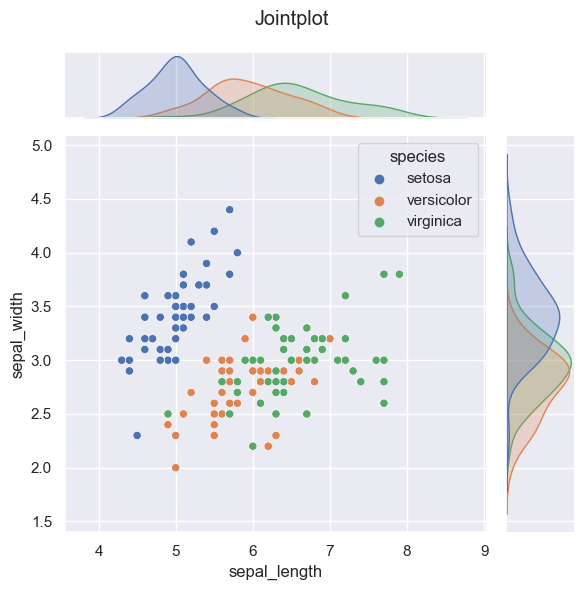

In [51]:
# Jointplot
# Util para ver relaciones y distribuciones a la vez
jointplot = sns.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species');
jointplot.fig.suptitle('Jointplot')
jointplot.fig.tight_layout(); # Evitar solapamiento de título y gráfica

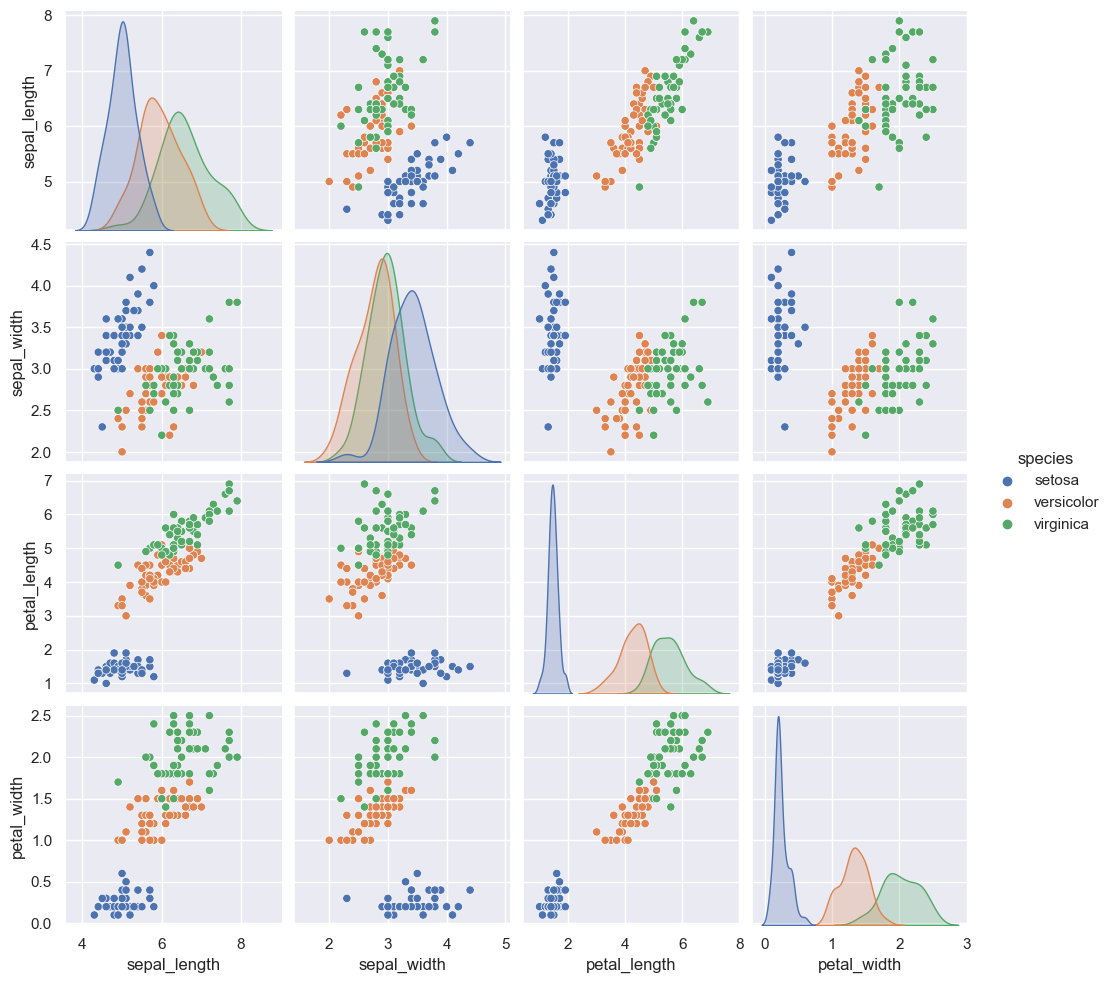

In [52]:
# Pairplot
pairplot = sns.pairplot(data = iris, hue = 'species');

# Paletas de colores

Seaborn cuenta con tres tipos de paletas de colores:
- Paletas cualitativas: para datos categóricos.
- Paletas secuenciales: para datos numéricos.
- Paletas divergentes: para datos numéricos con límites o puntos de referencia. 

## Paletas cualitativas

Utilizadas para representar un número limitado de categorías.

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/seaborn_qualitative_colormaps.png> </img></center>

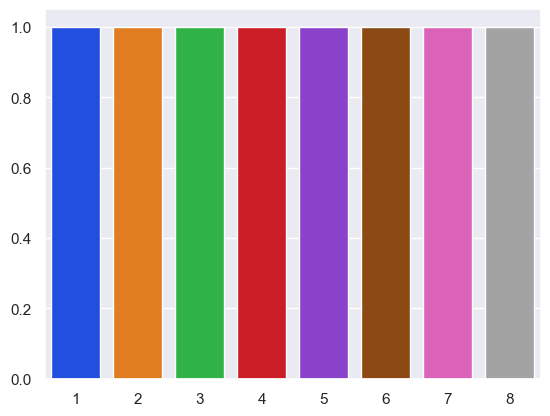

In [53]:
# Usa la paleta 'bright'
sns.barplot(x = list(range(1, 9)), y = [1] * 8, palette = 'bright');

## Paletas secuenciales

Contienen una escala continua de valores

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/seaborn_sequential_palettes.png> </img></center>

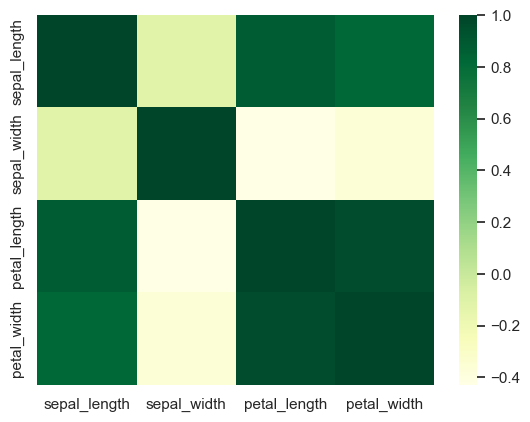

In [54]:
sns.heatmap(
    data = iris.corr(), # Correlación entre métricas
    cmap = 'YlGn' # Elegir paleta. Añade '_r' para invertir
    );

## Paletas divergentes

Similares a las continuas, pero con un punto de referencia a partir del cual nacen dos escalas continuas con colores distintos. Basado en el [modelo de color HSL](https://es.wikipedia.org/wiki/Modelo_de_color_HSL), requieren indicar el matiz del color de ambos extremos. Seaborn elegirá automáticamente la saturación y la intensidad. Por defecto, estos son 75 y 50, respectivamente.

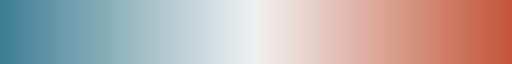

In [55]:
sns.diverging_palette(220, 20, as_cmap=True)

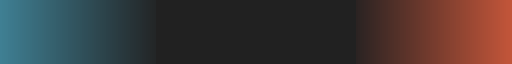

In [56]:
# Parámetros opcionales para las paletas divergentes
sns.diverging_palette(
    220, # Extremo izquierdo
    20, # Extremo derecho
    sep = 100, # Cuánto ocupa el color central
    center = 'dark', # Centro claro ('light') u oscuro ('dark')
    as_cmap = True # Devolver como paleta divergente y no categórica
)

## Casos prácticos para Seaborn

#### Vista de los datos

In [57]:
from plotly.express.data import gapminder
data = gapminder()
data.head(10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


### 1) Grafica el PIB per cápita de España por años con un gráfico de línea en Seaborn

- Utiliza la variable `datos`
- Añade un título al gráfico y a los ejes horizontal y vertical
- Cambia el color de la línea

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/seaborn_ex_1.png> </img></center>

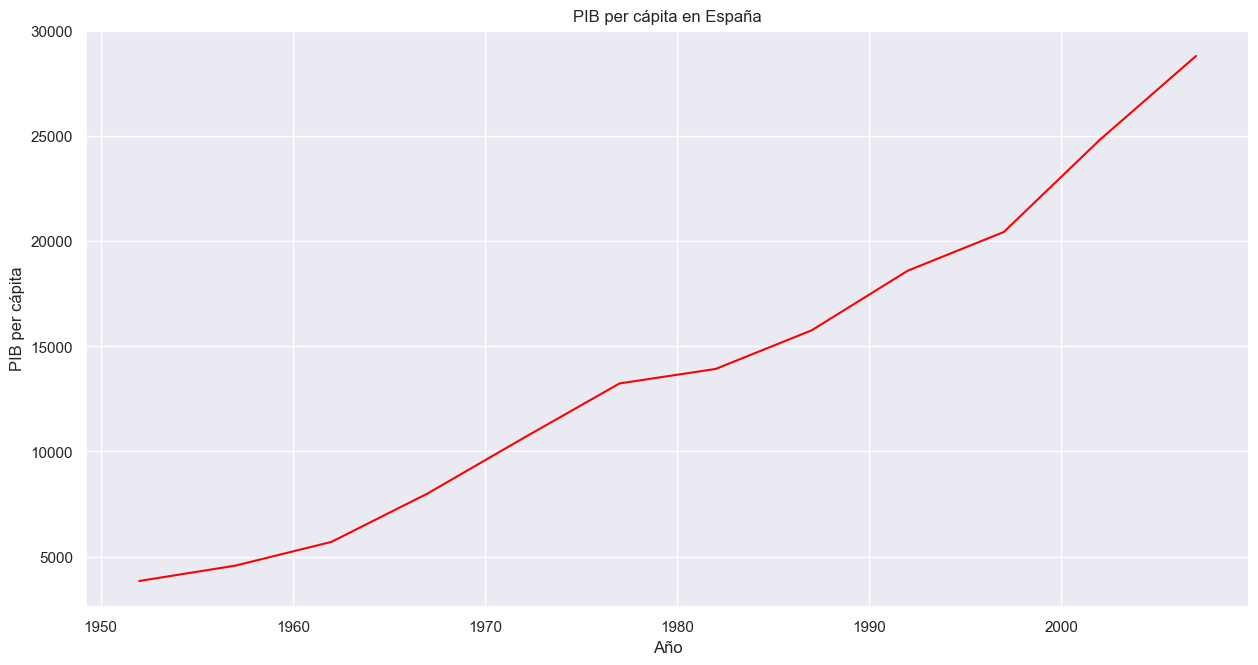

In [58]:
datos = data.query('country == "Spain"')

...

fig, ax = plt.subplots(figsize = (15, 7.5))
fig = sns.lineplot(
    data = datos,
    x = 'year',
    y = 'gdpPercap',
    color = 'red',
)

fig.set_title('PIB per cápita en España')
fig.set_xlabel('Año')
fig.set_ylabel('PIB per cápita');

### 2) Grafica la correlacción entre variables con un heatmap en Seaborn

- Utiliza la variable `datos`
- Utiliza `paleta` como argumento para el parámetro `cmap` del heatmap
- Define los parámetros `vmin` y `vmax` como -1 y 1
- Muestra la correlación en número dentro de la celda
- Tamaño recomendado: (10, 8) 

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/seaborn_ex_2.png> </img></center>

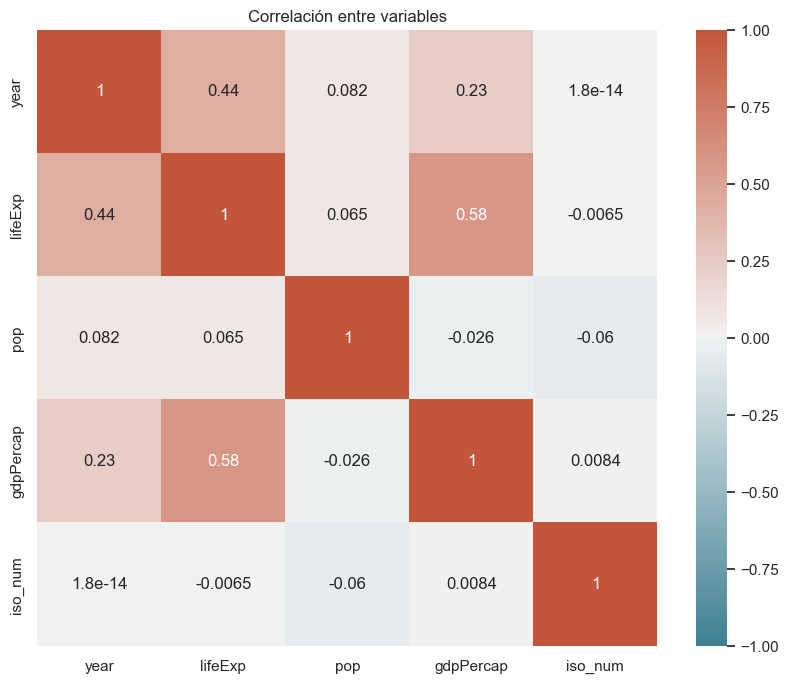

In [59]:
datos = data.corr()
paleta = sns.diverging_palette(220, 20, as_cmap=True) # Paleta roja y azul

...

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(
    datos, 
    cmap = paleta,
    center = 0,
    vmin = -1,
    vmax = 1,
    annot = True)

ax.set_title('Correlación entre variables');


### 3) Grafica la dsitribución de la esperanza de vida en 2007 con Seaborn 

- Utiliza el tamaño de imagen (5, 5)
- Usa 15 bins

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/seaborn_ex_3.png> </img></center>

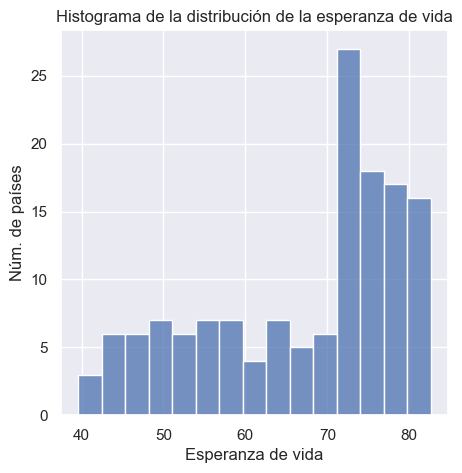

In [60]:
datos = data.query('year == 2007')

...

fig, ax = plt.subplots(figsize = (5, 5))
ax = sns.histplot(
    datos,
    x = 'lifeExp',
    bins = 15)

ax.set_title('Histograma de la distribución de la esperanza de vida')
ax.set_xlabel('Esperanza de vida')
ax.set_ylabel('Núm. de países');

### 4) Grafica la distribución de la esperanza de vida en 2007 separando por continente con Seaborn 

Tendrás que utilizar el gráfico de imagen `sns.displot`

- Utiliza la variable `datos`
- Pon cada plot en una columna distinta
- Pon un color distinto a cada continente
- Prueba a añadir la estimación de la densidad de distribución (`kde`)

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/seaborn_ex_4.png> </img></center>

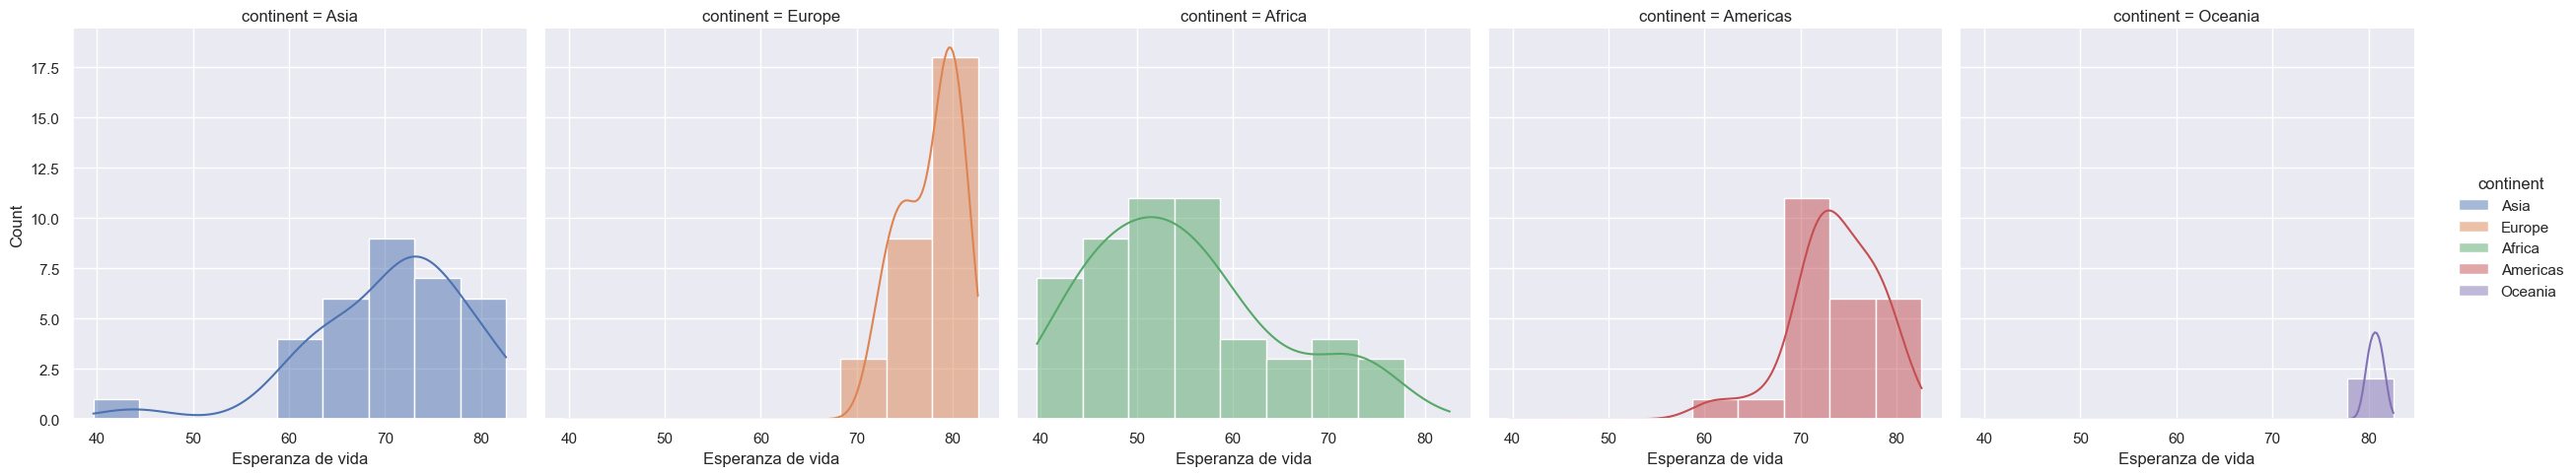

In [61]:
datos = data.query('year == 2007')

...

fig = sns.displot(
    datos,
    x = 'lifeExp',
    hue = 'continent',
    kind = 'hist',
    col = 'continent',
    kde = True
)

fig.set(xlabel = 'Esperanza de vida');

# Plotly Express

In [62]:
# Importar Plotly
import plotly.express as px

In [63]:
# Obtener datos
data = px.data.gapminder()

# Crear columna para PIB (GDP)
data['gdp'] = data['pop'] * data['gdpPercap']

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


## Plotly Express vs. Plotly Graph Objects

Todos los gráficos de Plotly tienen la estructura de diccionario. El módulo graph_objects contiene todas los objetos individuales de un gráfico. Pueden acumularse unos sobre otros desde sus partes más pequeñas hasta construir la imagen final, como en la siguiente celda.

In [64]:
import plotly.graph_objects as go

dict_of_fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "Gráfico construido con objetos individuales"}}
})

fig = go.Figure(dict_of_fig)

fig.show()

Por su parte, Plotly Express permite crear gráficos rápidamente indicando solo algunos datos y dando valores por defecto al resto de características.

Se recomienda utilizar Plotly Express para generar las imágenes y, después, modificar los objetos individuales que generan el gráfico.

In [65]:
# Crear objeto con Express
fig = px.bar(
    x = [1, 2, 3],
    y =  [1, 3, 2],
    title = "Gráfico construido con Express")

# Cambiar etiqueta del eje Y
fig.update_layout(yaxis_title = 'Cambiando etiqueta del eje Y')

In [66]:
fig['layout']

Layout({
    'barmode': 'relative',
    'legend': {'tracegroupgap': 0},
    'template': '...',
    'title': {'text': 'Gráfico construido con Express'},
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Cambiando etiqueta del eje Y'}}
})

## Gráficos en Plotly

### Gráfico de linea

In [67]:
fig = px.line(
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia', # Título del gráfico
    color = 'country'
    )
fig.show()

#### Personalizando el gráfico

* **Tamaño**: a diferencia de Matplotlib y Seaborn, en Plotly puede indicarse el tamaño directamente al crear la imagen con los parámetros `width` y `height`.
  
* **Etiquetas**: requiere un diccionario que indique con qué términos se deben reemplazar los valores por defecto.
  
* **Color**: dos métodos:
  * `color_discrete_sequence`: asigna colores en función del orden en el que aparecen los datos.
  * `color_discrete_map`: asigna colores directamente uno a uno.


In [68]:
# Personalizando el gráfico
fig = px.line(
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia', # Título del gráfico

    # Tamaño del gráfico en píxeles
    width = 1000,
    height = 375,

    # Colores
    color = 'country', # Determinar color según país
    # Códigos de color
    # Según orden de aparición
    color_discrete_sequence = ['red', 'green', 'blue'],
    # Indicando explícitamente qué línea usa qué color
    color_discrete_map = {
        'Spain' : 'red', # Texto
        'Portugal' : 'rgba(255, 255, 0, 1)', # Código RGBA
        'France' : '#34cfeb'}, # Código hexadecimal

    # Cambiar etiquetas
    labels = {
        'country' : 'País',
        'pop' : 'Población',
        'year' : 'Año'
    },

    # Marcadores
    markers = True,
    symbol = 'country',

    # Rango del gráfico
    # range_x = [1990, 2000],
    # range_y = [0, 1e8]
    )

# Centrar el título
fig.update_layout(title_x=0.5)

### Gráfico de barras

In [69]:
fig = px.bar(    
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia',
    color = 'country',
    barmode = 'group' # Desapilar las barras de los tres países
    )

# Modificar el número de ticks
fig.update_layout(
    yaxis = {
        'nticks' : 20},
    xaxis = {
        'nticks' : 20})

### Gráfico de área

In [70]:
px.area(
    data,
    x = 'year',
    y = 'gdp',
    line_group = 'country',
    color = 'continent',
    title = 'PIB mundial por año',
)

### Gráficos de caja

In [71]:
px.box(
    data,
    x = 'continent',
    y = 'gdpPercap',
    log_y = True,
    color = 'continent',
    hover_name= 'country'
)

### Gráfico de dispersión (scattermap)

In [72]:
px.scatter(
    data.query('year == 2007'),
    x = "gdpPercap", y="lifeExp", 
    log_x = True, # Poner el eje X en escala logarítmica
    title = 'PIB per cápita frente a esperanza de vida',

    size="pop", # Tamaño de las burbujas según población 
    size_max = 60, # Limitar el tamaño de las burbujas

    color = "continent", # Colorear según continente
    hover_name="country", # Nombre que aparece al poner el cursor encima
    
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'gdpPercap' : 'PIB per cápita',
        'continent' : 'Continente'
    }
)

### Gráfico circular (piechart)

In [73]:
px.pie(
    data.query('country in ("Spain", "Portugal", "United Kingdom", "France", "Germany", "Italy")').query('year == 2007'), 
    values = 'gdp',
    names = 'country',
    title = 'PIB en Europa Occidental en 2007',
    height = 500,
    width = 500
)

### Treemap

In [74]:
px.treemap(
    data.query('year == 2007'), 
    path = ['continent', 'country'],
    values = 'gdp',
    title = 'PIB mundial en 2007'    
)

### Sunburst

In [75]:
px.sunburst(
    data.query('year == 2007'),
    path = ['continent', 'country'], # Categorías que agrupan
    values = 'pop', # Valores finales
    color = 'lifeExp',
    labels = {'lifeExp' : 'Años'},
    hover_name= 'country',

    title = 'Población mundial y esperanza de vida en 2007',
    height = 500,
    width = 500
)

### Animaciones

In [76]:
px.scatter(
    data,
    x = 'pop',
    log_x = True,
    y = 'lifeExp',
    range_y = [30, 85],
    color = 'continent',
    hover_name = 'country',
    facet_col= 'continent',

    # Parámetros para animar
    animation_frame = 'year', # Animar año a año
    animation_group = 'country' # Agrupar por país

    )

In [77]:
px.bar(
    data, 
    x = "continent", 
    y="pop", range_y=[0,4000000000],
    color="continent",

  animation_frame="year", 
  animation_group="country"
  )

## Casos prácticos para Plotly

### 1) Grafica el PIB per cápita de Alemania por años con un gráfico de barras (barplot) en Plotly

* Utiliza la variable `datos`
* Añade un título
* Cambia las etiquetas de los ejes horizontal y vertical
* Centra el título del gráfico 

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/plotly_ex_1.png> </img></center>

In [78]:
datos = data.query('country == "Germany"')

...

fig = px.bar(
    datos,
    x = 'year',
    y = 'gdpPercap',
    labels = {
        'gdpPercap' : 'PIB per cápita',
        'year' : 'Año'
    },
    color_discrete_sequence = ['black'],
    title = 'PIB per cápita en Alemania'
)

fig.update_layout(title_x = 0.5)

### 2) Grafica la distribución de la esperanza de vida por continente en 2007 con un gráfico de cajas (boxplot) en Plotly

- Cambia las etiquetas de los ejes horizontal y vertical
- Pon un color distinto a cada continente

Ejemplo de solución:

<center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/plotly_ex_2.png> </img></center>

In [79]:
datos = data.query('year == 2007')

...

px.box(
    datos,
    x = 'continent',
    y = 'lifeExp',
    color = 'continent',
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'continent' : 'Continente'
    }
)

#### 3) Añade una animación al gráfico anterior

- Utiliza la variable `datos`, que contiene datos históricos
- Limita el rango del eje Y a 30 y 90
 
 Ejemplo de solución:

 <center> <img src=https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/img/exercise_solutions/plotly_ex_3_corrected.png> </img></center>

In [80]:
datos = data

px.box(
    datos,
    x = 'continent',
    y = 'lifeExp',
    range_y = [30, 90],
    color = 'continent',
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'continent' : 'Continente'
    },

    animation_frame = 'year',
    animation_group = 'country'
)

# Missingno

Missingno es una librería orientada al análisis visual de datos faltantes. Muy útil en las etapas iniciales de los análisis.

Para esta demo, utilizaremos los datos de Gapminder que ofrece Plotly

In [81]:
# Importaciones
!pip install missingno
import missingno as msno

You should consider upgrading via the 'C:\Users\jgcha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [82]:
# Cargar datos desde Plotly
# Obtener datos
data = px.data.gapminder()

# Crear columna para PIB (GDP)
data['gdp'] = data['pop'] * data['gdpPercap']

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


In [83]:
# Pasar los datos a formato ancho
data_ancho = pd.pivot(data, index = 'country', columns = 'year', values = 'gdpPercap')
data_ancho.head(10)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,779.445314,820.853030,853.100710,836.197138,739.981106,786.113360,978.011439,852.395945,649.341395,635.341351,726.734055,974.580338
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,5288.040382,6223.367465
Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,2773.287312,4797.231267
Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Australia,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Bahrain,9867.084765,11635.799450,12753.275140,14804.672700,18268.658390,19340.101960,19211.147310,18524.024060,19035.579170,20292.016790,23403.559270,29796.048340
Bangladesh,684.244172,661.637458,686.341554,721.186086,630.233627,659.877232,676.981866,751.979403,837.810164,972.770035,1136.390430,1391.253792


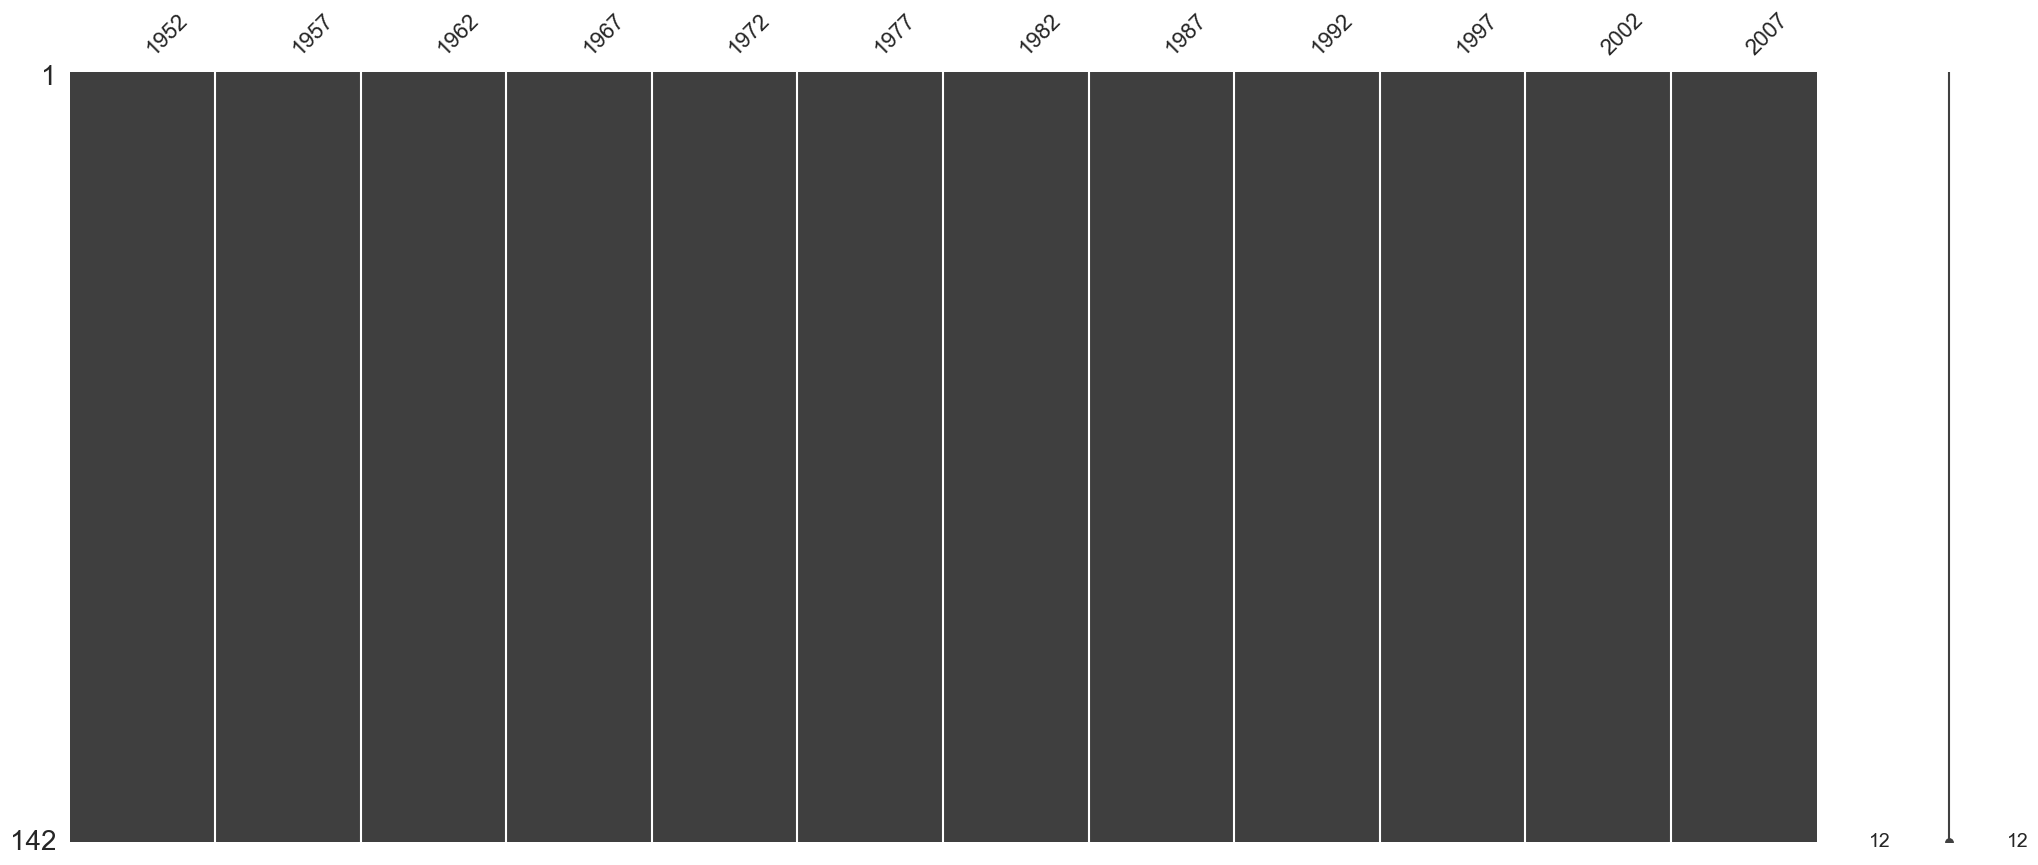

In [84]:
# Detectar nulos en data_ancho
msno.matrix(data_ancho);

In [85]:
# Eliminar algunos datos en data_ancho
data_ancho.iloc[23:41, 3:7] = np.nan
data_ancho.iloc[102:109, 6:9] = np.nan

En Missingno, las celdas con datos no nulos se marcan en negro. Si hay datos faltantes, aparecen en blanco,
La línea de la derecha indica en número de celdas con datos válidos en cada fila. Los números indican las filas con la máxima y mínima cantidad de datos válidos.

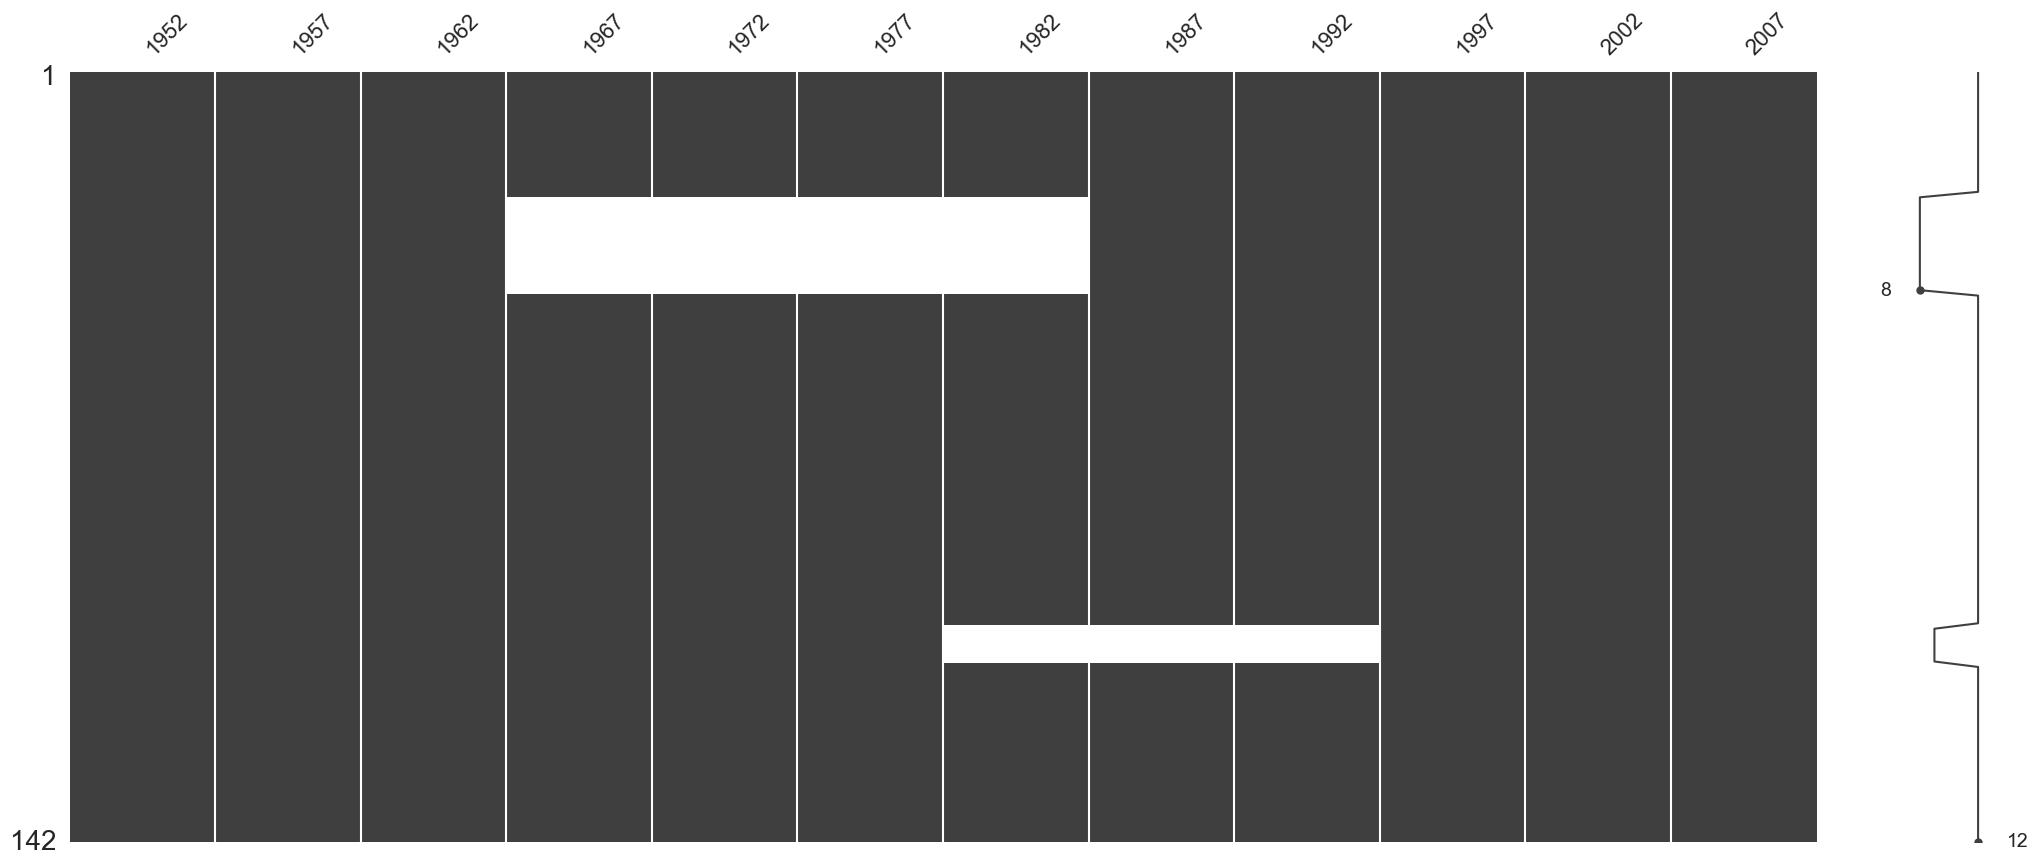

In [86]:
# Detectar nulos en data_ancho
msno.matrix(data_ancho);

También puede verse fácilmente a través del gráfico de barras.

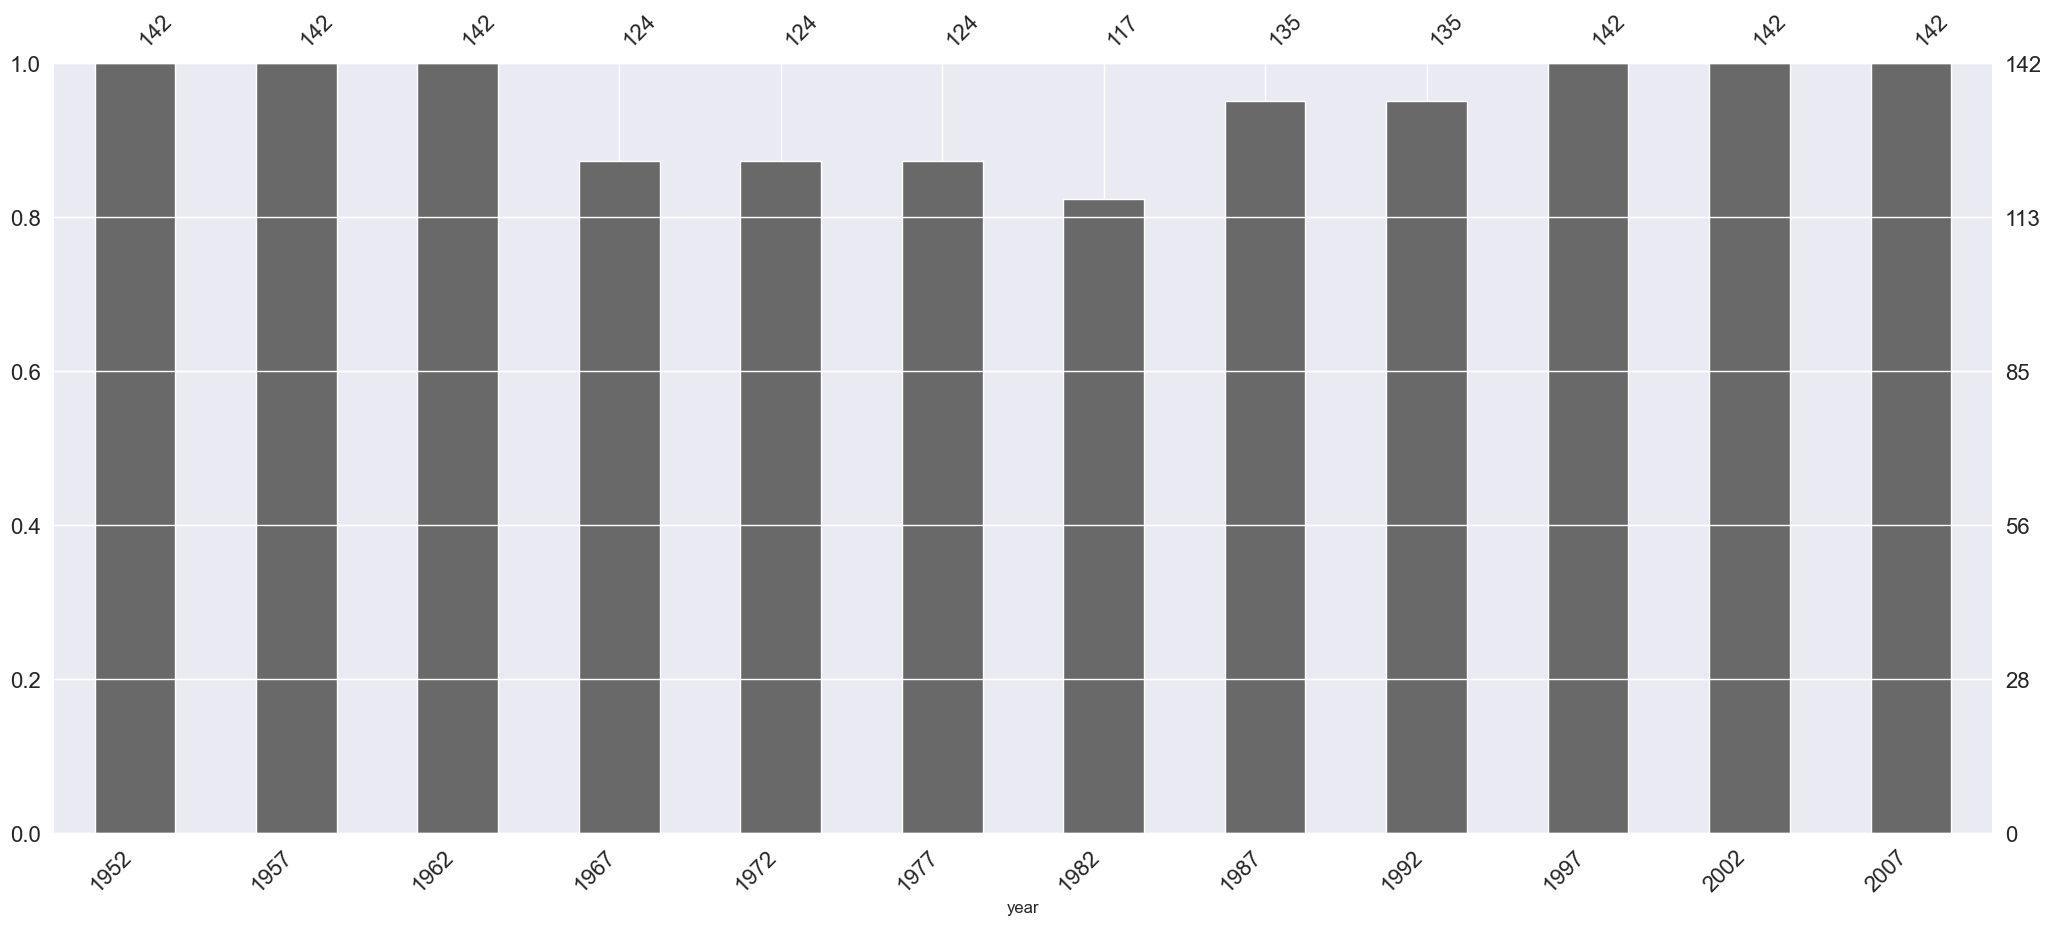

In [87]:
msno.bar(data_ancho);

En ocasiones y si el estudio lo permite, ordenar las filas en función del número de nulos ayuda a detectar
patrones. Esto puede lograrse fácilmente con la siguiente función:

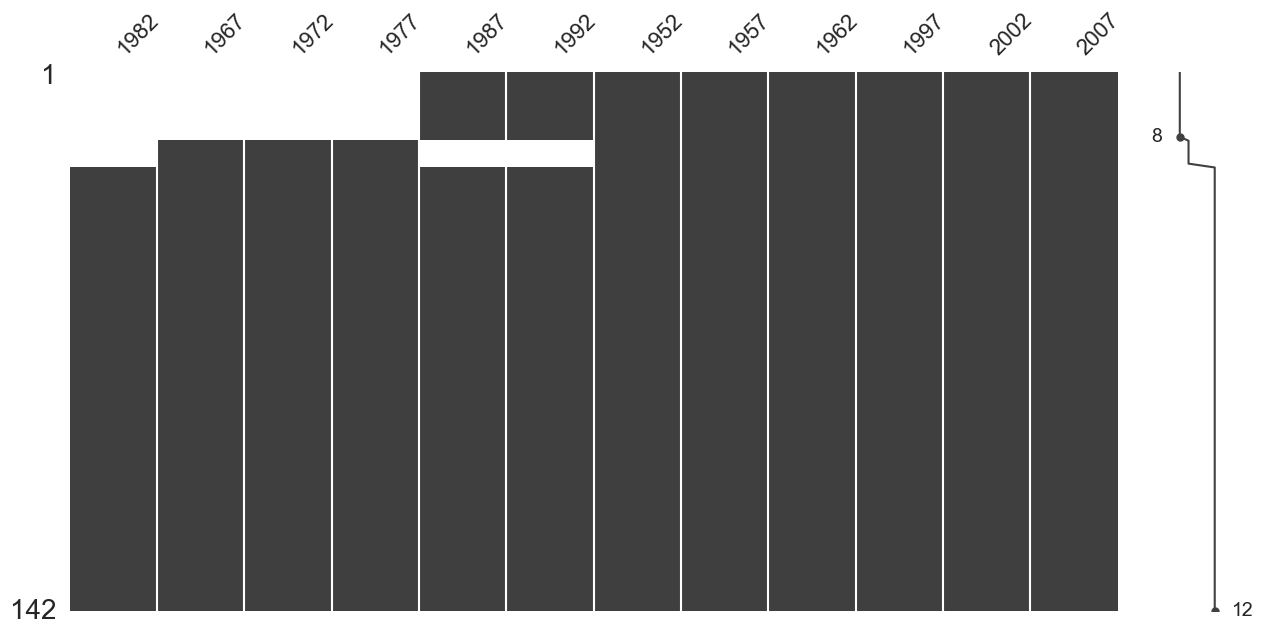

In [88]:
def msno_matriz_ordenada(datos):

  # Ordenar los datos según número de nulos
  indices_filas_nulos = datos.isnull().sum(axis = 1).sort_values(ascending = False).index
  indices_columnas_nulos = datos.isnull().sum(axis = 0).sort_values(ascending = False).index
  datos_ordenados_nans = datos.loc[indices_filas_nulos, indices_columnas_nulos]

  # Generar matriz final
  matriz = msno.matrix(datos_ordenados_nans, figsize = (15, 7))
  return matriz

msno_matriz_ordenada(data_ancho);

El dendograma describe las relaciones entre los datos faltantes. En este caso, vemos que une en un mismo grupo todas las columnas sin datos faltantes, y separa en tres los restantes: dos para los que solo carecen de un dato y otro extra para 1982, que contiene dos nulos. 

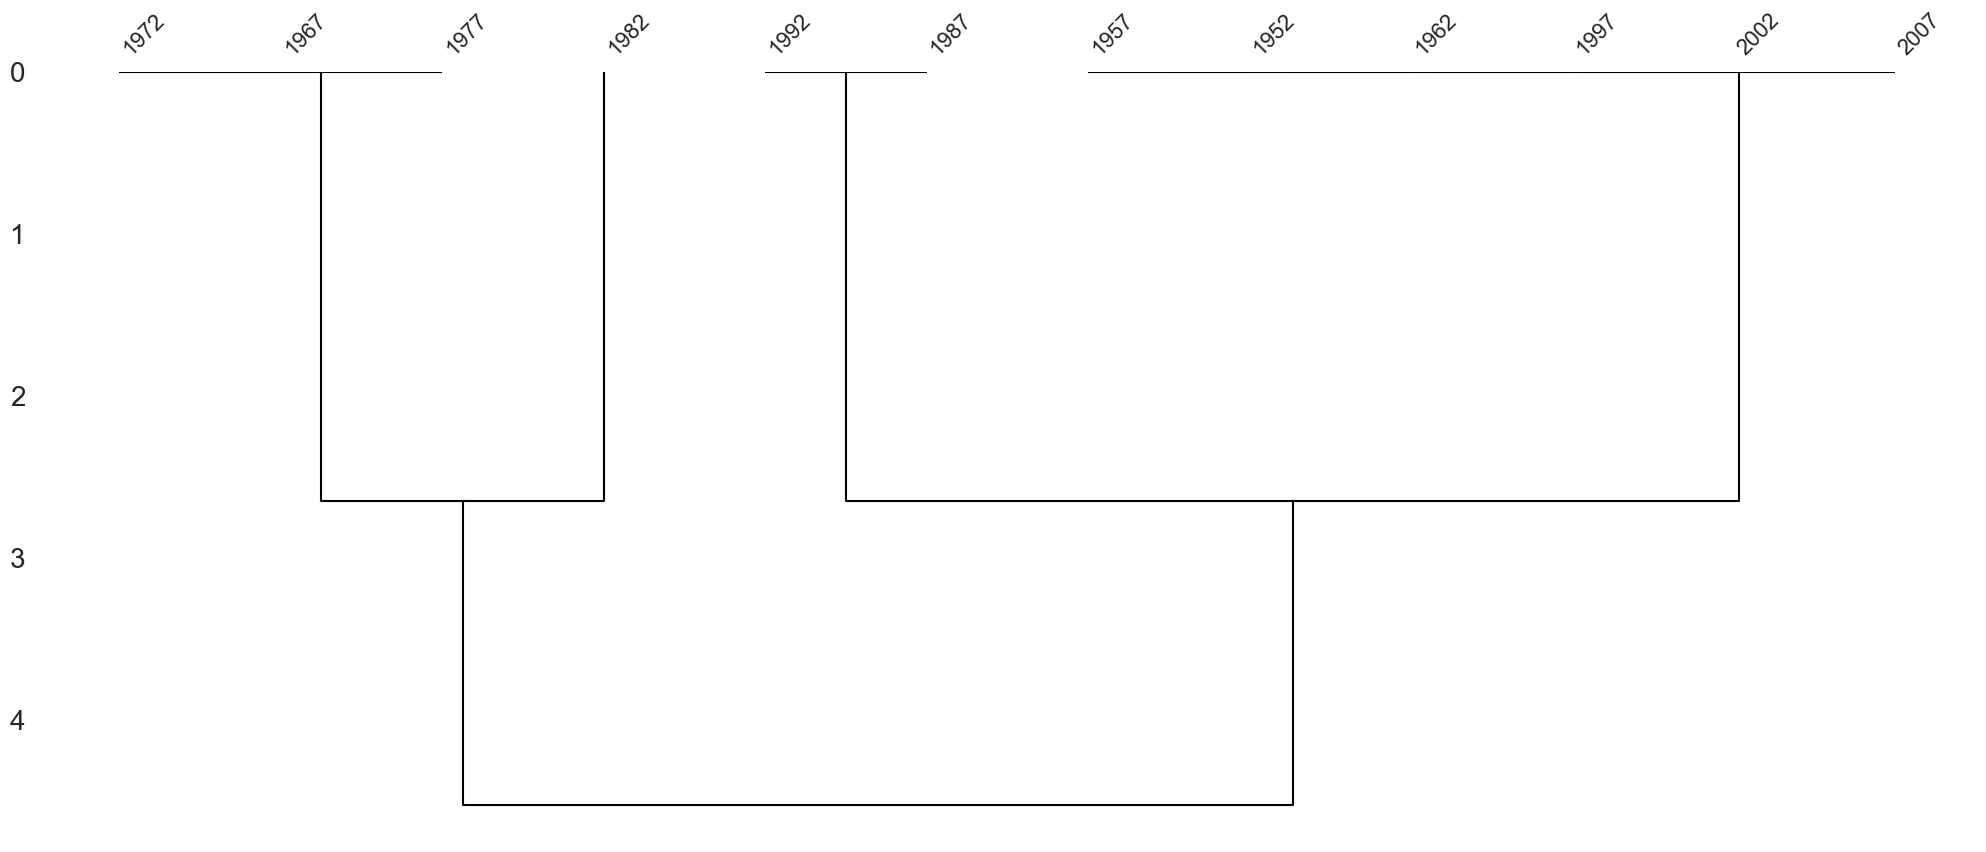

In [89]:
msno.dendrogram(data_ancho);

El mapa de calor (heatmap) muestra la correlación entre los **datos faltantes**, no entre el valor de las celdas en sí: 
* 1 indica que si un dato está presente en una columna, estará también en otra la otra columna.
* -1 indica que si un dato no está en una columna, sí estará en la otra columna, y viceversa.

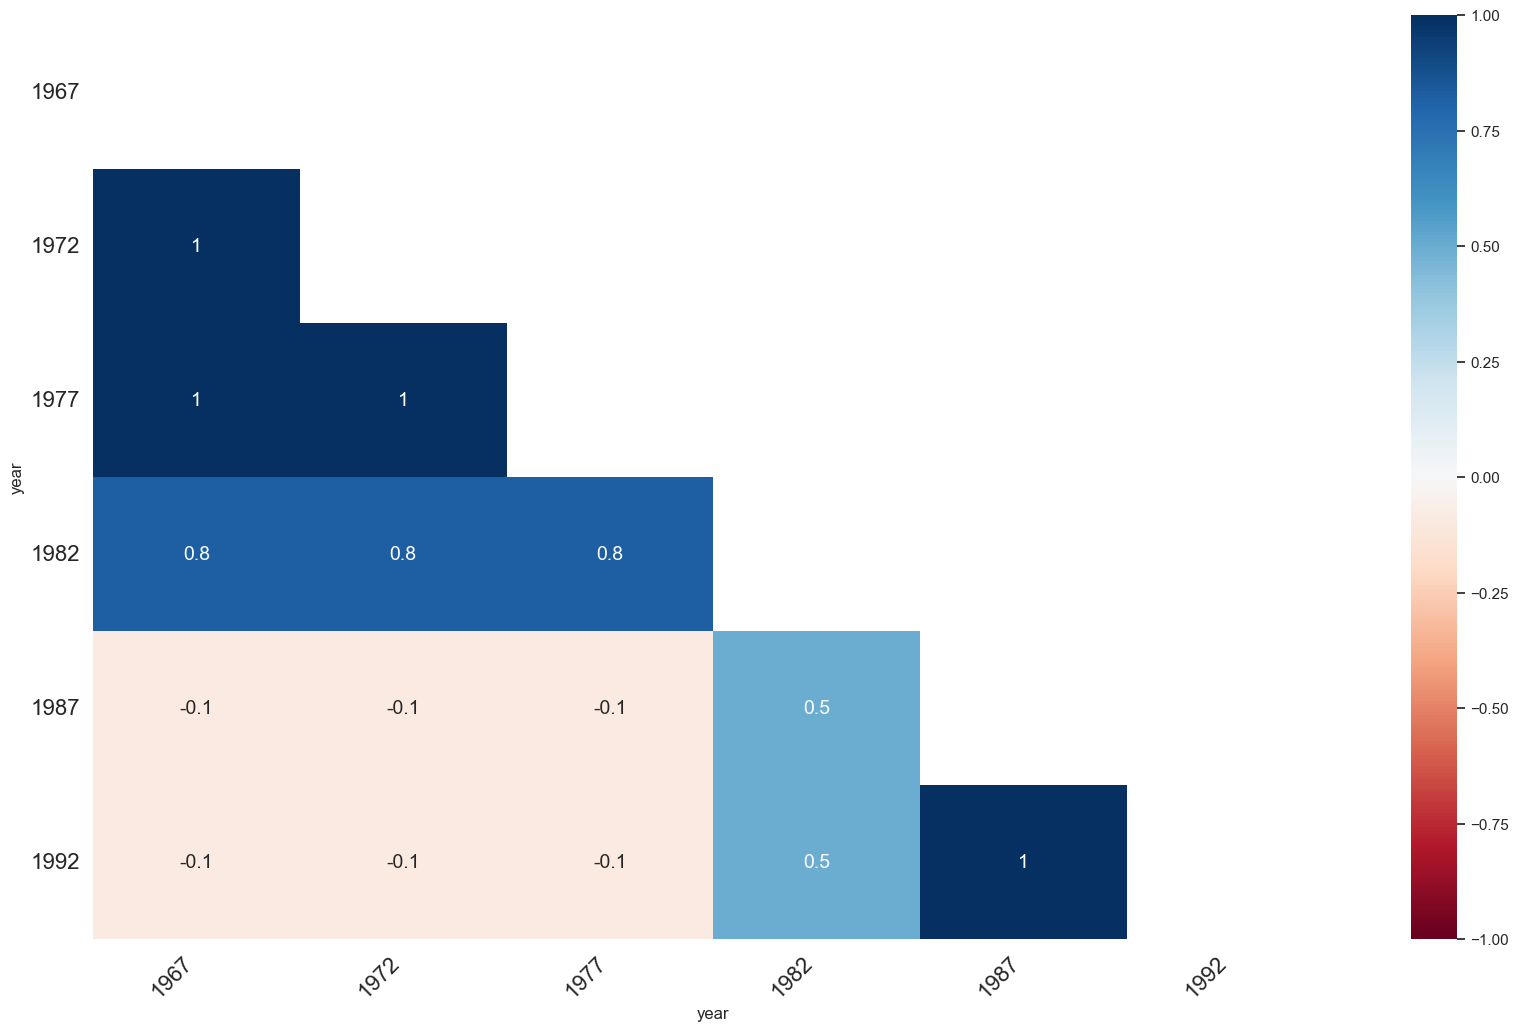

In [90]:
msno.heatmap(data_ancho);

# Enlaces de interés

### Matplotlib

- [Programación explícita frente a implícita](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces)
- [Cheatsheets para Matplotlib](https://matplotlib.org/cheatsheets/)
- [Selector de códigos hexadecimales para colores](https://htmlcolorcodes.com/es/)
- [Argumentos para texto en Matplotlib](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)

### Seaborn
* [Galería de ejemplos de Seaborn](https://seaborn.pydata.org/examples/index.html)
* [Selector de colores HSL](https://www.w3schools.com/colors/colors_hsl.asp)

### Plotly

* [Introducción a Plotly Express](https://plotly.com/python/plotly-express/)
* [Documentación de Plotly](https://plotly.com/python-api-reference/)
* [Galería de ejemplos de Plotly](https://plotly.com/python/)

### Missingno

* [Repositorio original y documentación de Missingno](https://github.com/ResidentMario/missingno)